# **Guided Project: Exploring eBay Car Sales Data**

## Introduction

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.\
The original data can be found [here](https://data.world/data-society/used-cars-data) 

In this project, we will work with the extracted part of the original dataset.\
The aim of this project is to clean the data and analyze the used car listings including:\
- find statistical dependences (correlation) between the starting price of a car and its characteristics;
- specify the methods most suitable for the study of the original data

**Data information**

The dataset contains 50000 data points extracted from the original data and provides the following information:

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

## Chapter A. Preparation of the File and Brief Observation of the Data

**Step A.1. Preparation of the File**

In [107]:
# import libraries
# for dealing with the data
import pandas as pd
import numpy as np
# for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
#prepare Jupyther Notebook
%matplotlib inline 

In [108]:
# read data (encoding dafault)
#autos = pd.read_csv("autos.csv", encoding = 'UTF-8')

Got error <UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 732: invalid continuation byte>.\
Let's try other encoding methods.    

In [109]:
# read data (encoding Latin-1)
autos = pd.read_csv("autos.csv", encoding = 'Latin-1')
print("The file contains", len(autos.columns), "columns and", len(autos.index), "rows" )

The file contains 20 columns and 50000 rows


Decoding is successful, let's look at the data

**Step A.2. Brief Data Exploration**

Let's look at the data using various methods to understand what it contains inside.

In [110]:
# standart statistic
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [111]:
# use method 'df' to look at the head and tail of data at the time
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [112]:
# look at the 10 random rows
autos.sample(10).sort_index()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
8438,2016-03-14 21:37:21,Jaguar_xj_40_Daimler_Original_Baujahr_1994,privat,Angebot,$0,test,NaN,1995,automatik,0,NaN,"5,000km",3,NaN,jaguar,nein,2016-03-14 00:00:00,0,12099,2016-03-25 11:45:38
9289,2016-03-29 19:53:03,Polo_1.9_TDI_GT_Sportline,privat,Angebot,"$2,500",control,limousine,2008,NaN,0,polo,"150,000km",11,diesel,volkswagen,nein,2016-03-29 00:00:00,0,26131,2016-03-29 19:53:03
11285,2016-03-21 18:53:39,Renault_Twingo_1_2_16V_75PS_Sportfahrwerk_Intr...,privat,Angebot,$888,test,kleinwagen,2001,manuell,75,twingo,"150,000km",2,benzin,renault,nein,2016-03-21 00:00:00,0,26954,2016-03-30 07:16:57
12928,2016-03-23 21:46:53,Opel_Astra_1.7_CDTI_Caravan_DPF_Sport,privat,Angebot,"$4,200",test,kombi,2008,manuell,125,astra,"150,000km",4,diesel,opel,nein,2016-03-23 00:00:00,0,66424,2016-04-06 03:16:17
21488,2016-03-10 00:53:16,Citroën_Berlingo_Multispace_e_HDi_90_FAP_EGS6_...,privat,Angebot,"$15,000",control,bus,2014,automatik,92,berlingo,"10,000km",11,diesel,citroen,nein,2016-03-09 00:00:00,0,81379,2016-04-05 19:18:34
21679,2016-03-31 14:42:33,BMW_118i_Cabrio,privat,Angebot,"$15,800",control,cabrio,2008,manuell,143,1er,"70,000km",4,benzin,bmw,nein,2016-03-31 00:00:00,0,49219,2016-04-06 07:15:58
29628,2016-03-08 17:44:18,BMW_e60_550i_M_Paket,privat,Angebot,"$13,500",control,NaN,2006,automatik,396,5er,"150,000km",10,NaN,bmw,NaN,2016-03-08 00:00:00,0,49696,2016-03-27 11:17:40
35751,2016-03-18 00:37:58,BMW_318i_Edition_Lifestyle,privat,Angebot,"$4,200",test,limousine,2004,manuell,143,3er,"150,000km",7,benzin,bmw,nein,2016-03-17 00:00:00,0,33175,2016-03-25 01:19:38
36023,2016-04-01 10:37:03,Audi_A4_Avant_1.8_TFSI_Ambition,privat,Angebot,"$15,900",control,kombi,2008,manuell,160,a4,"125,000km",4,benzin,audi,nein,2016-04-01 00:00:00,0,82395,2016-04-07 06:46:12
40659,2016-03-08 11:25:20,Opel_Zafire__A__2.2_Diesel,privat,Angebot,"$2,500",control,bus,2003,manuell,125,zafira,"150,000km",5,diesel,opel,ja,2016-03-08 00:00:00,0,61440,2016-04-07 06:17:09


Three methods above showed next:
- 5000 rows in 20 columns.
- Data in 5 columns are int64 type.
- Data in 15 columns are object type (string).
- Columns "vehicleType", "gearbox", "model", "fuelType", "notRepairDamage" have null data
- The information in "dataCrawled", "dataCreated" & "lastSeen" columns has format "YYYY-MM-DD HH:MM:SS" and stored as string.
- The information in the "name" column has underlines, backslashes and other simbols and in general is not much understandable.
- The price is in dollars US and stored as string.

**The explanation why we should convert column names:**

The column names are not easy to understand, they use camel case instead of Python's preferred snake case.\
Therefore, there are not enough just to rename them, they need to be converted.

**Step A.3. Preparation of the file**

Step A.3.1. Let's convert the column names from camelcase to snakecase and rename some from them


In [113]:
#original names
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [114]:
 # install stringcase
%pip install stringcase

You should consider upgrading via the '/dataquest/system/env/python3/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [115]:
#import stringcase and snakecase from the library stringcase
import stringcase as stringcase
from stringcase import snakecase

In [116]:
#turning camelcase columns into snakecase columns
snakecase_col = []    # create an empty list of column names
    
for col in autos.columns: # use a for loop method
    col = snakecase(col)
    snakecase_col.append(col)
    
autos.columns = snakecase_col # assingment columns to the list of new names

#renaming some columns with new values
rename_columns = [
    ['abtest', 'ab_test'],
    ['year_of_registration','registration_year'],
    ['month_of_registration','registration_month'],
    ['not_repaired_damage','unrepaired_damage'],
    ['date_created','ad_created'],
    ['power_p_s','power_ps']
]

for old_col, new_col in rename_columns:
    autos.rename({old_col: new_col},axis=1,inplace=True)

In [117]:
# the list of new column names
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

**Step A.4. Making of resolition and planning the work**

Let's look at descriptive statistics for all columns.

In [118]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-25 19:57:10,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


**Resolution**

- columns 'seller', 'offer_type', 'nr_of_pictures', 'postal_code', 'registration_month' are rather useless for the further analysis and can be dropped
- columns with information about the time of the data are left aside for further decision
- the "name" column contains unreadable information, so it needs to be worked out
- columns "vehicle_type", "fuel_type", "unrepaired_damage" have NaN values (empty value) that need to be replaced with 'unknown'
- also 'vehicle_type', 'fuel_type', 'gearbox' columns contain german terms that can be translated into english
- the data in the "brand" column I would like to convert to real brand names like ford: Ford
- data in the "unrepaired_damage" column (excluding NaN): nein means "No" and "ja" means "Yes". Let's translate the meanings into English
- the "price" and "odometer" columns should be numeric, but they are stored as strings, so they should be cleared and converted to a numeric format

*Now we can plan the work with the data: let's use the notice above to mark following steps with headlines*

## Chapter B. Cleaning the data

We will start from the easy actions, gradually moving further

- columns 'seller', 'offer_type', 'nr_of_pictures', 'postal_code', 'registration_month' are rather useless for the further analysis and can be dropped

**Step B.1.Dropping columns**

Actually, any data can be used for analysis, e.g. "month of registration" could show tendense which season customets prefer to buy cars and then register them.\
For current analysis let's drop choosen columns and save the data in the new file for a case.

In [119]:
# saving data to a new file (to avoid data loss)
autos.to_csv('autos_step_1.csv', index = False)
# read the new data file
autos_1 = pd.read_csv("autos_step_1.csv", encoding = 'Latin-1')

In [120]:
# drop columns
autos_1.drop(['seller','offer_type','nr_of_pictures', 'postal_code','registration_month' ],axis=1,inplace=True)

In [121]:
# check out the output
autos_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_crawled       50000 non-null  object
 1   name               50000 non-null  object
 2   price              50000 non-null  object
 3   ab_test            50000 non-null  object
 4   vehicle_type       44905 non-null  object
 5   registration_year  50000 non-null  int64 
 6   gearbox            47320 non-null  object
 7   power_ps           50000 non-null  int64 
 8   model              47242 non-null  object
 9   odometer           50000 non-null  object
 10  fuel_type          45518 non-null  object
 11  brand              50000 non-null  object
 12  unrepaired_damage  40171 non-null  object
 13  ad_created         50000 non-null  object
 14  last_seen          50000 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.7+ MB


Now there are 15 columns in the date and we can move to the next step

- columns "vehicle_type", "fuel_type", "unrepaired_damage" have NaN values that need to be replaced with "unknown"

**Step B.2. Replacing NaN with 'Unknown'**

In [122]:
autos_1[["vehicle_type", "fuel_type", "unrepaired_damage"]] = autos_1[["vehicle_type", "fuel_type", "unrepaired_damage"]].fillna('unknown')

In [123]:
# control code (remove # to the choosen line before and after previous command line):
#autos_1['vehicle_type'].unique()
autos_1['fuel_type'].unique()
#autos_1['unrepaired_damage'].unique()

array(['lpg', 'benzin', 'diesel', 'unknown', 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [124]:
# look at the data
autos_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_crawled       50000 non-null  object
 1   name               50000 non-null  object
 2   price              50000 non-null  object
 3   ab_test            50000 non-null  object
 4   vehicle_type       50000 non-null  object
 5   registration_year  50000 non-null  int64 
 6   gearbox            47320 non-null  object
 7   power_ps           50000 non-null  int64 
 8   model              47242 non-null  object
 9   odometer           50000 non-null  object
 10  fuel_type          50000 non-null  object
 11  brand              50000 non-null  object
 12  unrepaired_damage  50000 non-null  object
 13  ad_created         50000 non-null  object
 14  last_seen          50000 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.7+ MB


Now we have seen what two more columns have NaN value. So let's replace NaN with unknown value too.\
Since we already filled several columns with values, we will take the similar step, and will not change the code above.

In [125]:
autos_1[["gearbox", "model"]] = autos_1[["gearbox", "model"]].fillna('unknown')

In [126]:
# control line:
autos_1['gearbox'].unique()
#autos_1['model'].unique()

array(['manuell', 'automatik', 'unknown'], dtype=object)

In [127]:
#again, check out the result
autos_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_crawled       50000 non-null  object
 1   name               50000 non-null  object
 2   price              50000 non-null  object
 3   ab_test            50000 non-null  object
 4   vehicle_type       50000 non-null  object
 5   registration_year  50000 non-null  int64 
 6   gearbox            50000 non-null  object
 7   power_ps           50000 non-null  int64 
 8   model              50000 non-null  object
 9   odometer           50000 non-null  object
 10  fuel_type          50000 non-null  object
 11  brand              50000 non-null  object
 12  unrepaired_damage  50000 non-null  object
 13  ad_created         50000 non-null  object
 14  last_seen          50000 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.7+ MB


Finally, there are no empty value. Let's go to the next step.

- also 'vehicle_type', 'fuel_type', 'gearbox' columns contain german terms that must be translated into english
- data in the "unrepaired_damage" column: nein means "No" and "ja" means "Yes". Let's translate the meanings into English

**Step B.3. Replacing German terms by English ones**

By the way let's count values in the columns to think about furture analysis.

In [128]:
autos_1["unrepaired_damage"] = autos_1["unrepaired_damage"].str.replace('nein','No')\
.str.replace('ja', 'Yes').str.replace('unknown', 'Unknown')
un_damage_counts = autos_1['unrepaired_damage'].value_counts()
print(un_damage_counts)

No         35232
Unknown     9829
Yes         4939
Name: unrepaired_damage, dtype: int64


In [129]:
autos_1["fuel_type"] = autos_1["fuel_type"].str.replace('lpg','tractor_fuel').str.replace('benzin','gasoline').str.replace('cng', 'cn_gas')\
    .str.replace('elektro', 'electricity').str.replace('andere','other')

fuel_type_counts = autos_1['fuel_type'].value_counts()
print(fuel_type_counts)

gasoline        30107
diesel          14567
unknown          4482
tractor_fuel      691
cn_gas             75
hybrid             37
other              22
electricity        19
Name: fuel_type, dtype: int64


In [130]:
autos_1["vehicle_type"] = autos_1["vehicle_type"].str.replace('kleinwagen','small_car').str.replace('limousine', 'sedan').str.replace('cabrio', 'convertible')\
    .str.replace('andere', 'other').str.replace('kombi','estate_wagon')
vehicle_type_counts = autos_1['vehicle_type'].value_counts()
print(vehicle_type_counts)

sedan           12859
small_car       10822
estate_wagon     9127
unknown          5095
bus              4093
convertible      3061
coupe            2537
suv              1986
other             420
Name: vehicle_type, dtype: int64


In [131]:
autos_1["gearbox"] = autos_1["gearbox"].str.replace('manuell','manual').str.replace('automatik', 'automatic')

In [132]:
# again, let's create the control line
# autos_1['vehicle_type'].unique()
# autos_1['fuel_type'].unique()
# autos_1['unrepaired_damage'].unique()
autos_1['gearbox'].unique()

array(['manual', 'automatic', 'unknown'], dtype=object)

Now we can better understand the terms in data and knew some statistic\
(I know little about cars and fuels, by the way, so I am not sure that my translation is fully correct).\
Let's move further.

- the data in the "brand" column I would like to convert to real brand names like ford: Ford

**Step B.4. Replacing brand name by real ones**

In [133]:
# to shorten the code, let's do it in two steps:
# 1. use the title() method
autos_1['brand']= autos_1['brand'].str.title()

In [134]:

# got the new values and see which value is not right yet
autos_1['brand'].unique()

array(['Peugeot', 'Bmw', 'Volkswagen', 'Smart', 'Ford', 'Chrysler',
       'Seat', 'Renault', 'Mercedes_Benz', 'Audi', 'Sonstige_Autos',
       'Opel', 'Mazda', 'Porsche', 'Mini', 'Toyota', 'Dacia', 'Nissan',
       'Jeep', 'Saab', 'Volvo', 'Mitsubishi', 'Jaguar', 'Fiat', 'Skoda',
       'Subaru', 'Kia', 'Citroen', 'Chevrolet', 'Hyundai', 'Honda',
       'Daewoo', 'Suzuki', 'Trabant', 'Land_Rover', 'Alfa_Romeo', 'Lada',
       'Rover', 'Daihatsu', 'Lancia'], dtype=object)

In [135]:
# Now let's replace some brand names with original ones
autos_1["brand"] = autos_1["brand"].str.replace('Bmw','BMW').str.replace('Seat', 'SEAT')\
    .str.replace('Mini', 'MINI').str.replace('Saab','SAAB').str.replace('Mercedes_Benz', 'Mercedes Benz')\
    .str.replace('Sonstige_Autos', 'Sonstige Autos').str.replace('Land_Rover', 'Land Rover').str.replace('Alfa_Romeo', 'Alfa Romeo')

In [136]:
#Look that we have got and how often every brand can be met in the data
brand_counts = autos_1['brand'].value_counts()
print(brand_counts)

Volkswagen        10687
Opel               5461
BMW                5429
Mercedes Benz      4734
Audi               4283
Ford               3479
Renault            2404
Peugeot            1456
Fiat               1308
SEAT                941
Skoda               786
Mazda               757
Nissan              754
Smart               701
Citroen             701
Toyota              617
Sonstige Autos      546
Hyundai             488
Volvo               457
MINI                424
Mitsubishi          406
Honda               399
Kia                 356
Alfa Romeo          329
Porsche             294
Suzuki              293
Chevrolet           283
Chrysler            181
Dacia               129
Daihatsu            128
Jeep                110
Subaru              109
Land Rover           99
SAAB                 80
Daewoo               79
Trabant              78
Jaguar               77
Rover                69
Lancia               57
Lada                 31
Name: brand, dtype: int64


In [137]:
print("Okay, we got what we wanted, also we got some statistic.\nThe most popular brand is Volkswagen (", brand_counts.max(),
      "cars), the least is Lada (", brand_counts.min(),"cars).\nSince this is Germany, it looks understandable.")

Okay, we got what we wanted, also we got some statistic.
The most popular brand is Volkswagen ( 10687 cars), the least is Lada ( 31 cars).
Since this is Germany, it looks understandable.


- the "price" and "odometer" columns should be numeric, but they are stored as strings, so they should be cleared and converted to a numeric format

**Step B.5. Cleaning and Converting Data in Numeric format**

*Step B.5.1. Cleaning the 'price' and 'odometer' columns* 

In [138]:
# lets's look in the price column
price_counts = autos_1['price'].value_counts()
print(price_counts)

$0        1421
$500       781
$1,500     734
$2,500     643
$1,000     639
          ... 
$3,580       1
$255         1
$2,498       1
$7,373       1
$8,655       1
Name: price, Length: 2357, dtype: int64


Before convertation in numeric format let's remove unnecessary simbols '$' and ','.

In [139]:
autos_1["price_$"] = autos_1["price"].str.replace("$","").str.replace(",", "")

In [140]:
#Checking out shows that now there are digital in the column
autos_1["price_$"].str.isdigit().unique()

array([ True])

In [141]:
# lets's look in the odometer column
odometer_counts = autos_1['odometer'].value_counts()
print(odometer_counts)

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64


Before convertation in numeric format let's remove unnecessary simbols 'km' and ','.

In [142]:
autos_1["odometer_km"] = autos_1["odometer"].str.replace("km","").str.replace(",", "")

In [143]:
#Checking out also shows there are digitals
autos_1["odometer_km"].str.isdigit().unique()

array([ True])

*Step B.5.2. Converting Data in Numeric format*

In [144]:
autos_1["price_$"] = autos_1["price_$"].astype(int)
autos_1["odometer_km"] = autos_1["odometer_km"].astype(int)

In [145]:
print("The data type of the 'price_$' column:", autos_1["price_$"].dtype,\
      ";\nof 'odometer_km' column:", autos_1["odometer_km"].dtype )

The data type of the 'price_$' column: int64 ;
of 'odometer_km' column: int64


Okay, we have done it and going to the next step.

- columns with information about the time of the data are left aside for further decision

**Step B.6. Manipulation with datatime columns**

*Step B.6.1. Prepare the library and function*

First of all, let's convert data in datatime and remove the time from the data

In [146]:
%pip install datetime # install the datetime library

You should consider upgrading via the '/dataquest/system/env/python3/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [147]:
import datetime as dt

In [148]:
# The information in the column have the single pattern YYYY-MM-DD HH:MM:SS.
# We hadly will need the time, let's remove it
# The values were saved as object (string), so it must be convertied in datatime type

#creating a function to reformat the columns with string format into date format.
def formatDate(dataset,column):
    dateformat = []
    for element in dataset[column]:
        element = dt.datetime.strptime(element, "%Y-%m-%d %H:%M:%S")
        element = element.date()
        dateformat.append(element)
    dataset[column] = dateformat           


*Step B.6.2. Convert the 'date_crawled' column*

In [149]:
formatDate(autos_1,'date_crawled')

In [150]:
#There are next datatime columns in the data: date_crawled and registration_year (other we removed)
# lets's look closer at these column values sepatarly as we already knew what the values have different patterns
dcrawled_counts = autos_1['date_crawled'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(dcrawled_counts)

2016-03-05    2.538
2016-03-06    1.394
2016-03-07    3.596
2016-03-08    3.330
2016-03-09    3.322
2016-03-10    3.212
2016-03-11    3.248
2016-03-12    3.678
2016-03-13    1.556
2016-03-14    3.662
2016-03-15    3.398
2016-03-16    2.950
2016-03-17    3.152
2016-03-18    1.306
2016-03-19    3.490
2016-03-20    3.782
2016-03-21    3.752
2016-03-22    3.294
2016-03-23    3.238
2016-03-24    2.910
2016-03-25    3.174
2016-03-26    3.248
2016-03-27    3.104
2016-03-28    3.484
2016-03-29    3.418
2016-03-30    3.362
2016-03-31    3.192
2016-04-01    3.380
2016-04-02    3.540
2016-04-03    3.868
2016-04-04    3.652
2016-04-05    1.310
2016-04-06    0.318
2016-04-07    0.142
Name: date_crawled, dtype: float64


In [151]:
period = dcrawled_counts.index.max() - dcrawled_counts.index.min()
print ("The earliest date is", dcrawled_counts.index.min(), ", the latest is", dcrawled_counts.index.max(),\
       ".\nSo, the data contains records for about a month - ", period)

The earliest date is 2016-03-05 , the latest is 2016-04-07 .
So, the data contains records for about a month -  33 days, 0:00:00


In [152]:
autos_1['date_crawled'].describe()

count          50000
unique            34
top       2016-04-03
freq            1934
Name: date_crawled, dtype: object

In [153]:
print("So, in the 'date_crawled' column there are", len(autos_1['date_crawled'].unique()),\
      "unique data for", len(autos_1) ,\
      "rows (actually every day).\nIn the day 03th of April 2016 there were made the most amount of records")

So, in the 'date_crawled' column there are 34 unique data for 50000 rows (actually every day).
In the day 03th of April 2016 there were made the most amount of records


*Step B.6.3. Convert the 'ad_created' column*

let's set the same manipulation with the "ad_created" column

In [154]:
formatDate(autos_1,'ad_created') # since we converted the data in the datatimeformat, we can get error as output

In [155]:
ad_created_counts = autos_1['ad_created'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(ad_created_counts)

2015-06-11    0.002
2015-08-10    0.002
2015-09-09    0.002
2015-11-10    0.002
2015-12-05    0.002
              ...  
2016-04-03    3.892
2016-04-04    3.688
2016-04-05    1.184
2016-04-06    0.326
2016-04-07    0.128
Name: ad_created, Length: 76, dtype: float64


In [156]:
period_ad = ad_created_counts.index.max() - ad_created_counts.index.min()
print("There are", len(autos_1['ad_created'].unique()), "unique values in the 'ad_created' column.\nThe earliest date is"\
, ad_created_counts.index.min(),", the latest is", ad_created_counts.index.max(),".\nSo, the data contains records for", period_ad) 

There are 76 unique values in the 'ad_created' column.
The earliest date is 2015-06-11 , the latest is 2016-04-07 .
So, the data contains records for 301 days, 0:00:00


In [157]:
autos_1['ad_created'].describe()

count          50000
unique            76
top       2016-04-03
freq            1946
Name: ad_created, dtype: object

In addition to the observation above, in the day 03 April 2016 there were made the most amount of records (1946 lines).

*Step B.6.4. Convert the 'last_seen' column*

Now, le's set the same manipulation with the "last_seen" column

In [158]:
formatDate(autos_1,'last_seen')

In [159]:
last_seen_counts = autos_1['last_seen'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(last_seen_counts)

2016-03-05     0.108
2016-03-06     0.442
2016-03-07     0.536
2016-03-08     0.760
2016-03-09     0.986
2016-03-10     1.076
2016-03-11     1.252
2016-03-12     2.382
2016-03-13     0.898
2016-03-14     1.280
2016-03-15     1.588
2016-03-16     1.644
2016-03-17     2.792
2016-03-18     0.742
2016-03-19     1.574
2016-03-20     2.070
2016-03-21     2.074
2016-03-22     2.158
2016-03-23     1.858
2016-03-24     1.956
2016-03-25     1.920
2016-03-26     1.696
2016-03-27     1.602
2016-03-28     2.086
2016-03-29     2.234
2016-03-30     2.484
2016-03-31     2.384
2016-04-01     2.310
2016-04-02     2.490
2016-04-03     2.536
2016-04-04     2.462
2016-04-05    12.428
2016-04-06    22.100
2016-04-07    13.092
Name: last_seen, dtype: float64


In [160]:
autos_1['last_seen'].describe()

count          50000
unique            34
top       2016-04-06
freq           11050
Name: last_seen, dtype: object

In [161]:
period_ls = last_seen_counts.index.max() - last_seen_counts.index.min()
print("There are", len(autos_1['last_seen'].unique()), "unique values in the 'last_seen' column.\nThe earliest date is"\
, last_seen_counts.index.min(),", the latest is", last_seen_counts.index.max(),".\nSo, the data contains records for", period_ls) 

There are 34 unique values in the 'last_seen' column.
The earliest date is 2016-03-05 , the latest is 2016-04-07 .
So, the data contains records for 33 days, 0:00:00


In addition to the observation above, in the day 06th April 2016 there were made the most amount of records (11050 lines).

*Step B.6.5. Exploration the 'registration_year' column*

Now, let's set the same manipulation with the "registration_year" column.\
The data type is int64 (the method df.info() above), so it is not necessary to convert the data.

In [162]:
reg_year_counts = autos_1['registration_year'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(reg_year_counts)

1000    0.002
1001    0.002
1111    0.002
1500    0.002
1800    0.004
        ...  
6200    0.002
8888    0.002
9000    0.004
9996    0.002
9999    0.008
Name: registration_year, Length: 97, dtype: float64


The ealiest data is 1000, the latest is 9999. It is something fantastic.\
    It is known that car registration started in 1899 in Munich.\
    And of course the year of registration cannot be later then the listing has been seen.\
    So the data in this column must be cleaned.

In [163]:
autos_1['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [164]:
period_reg = reg_year_counts.index.max() - reg_year_counts.index.min()
print("There are", len(autos_1['registration_year'].unique()), "unique values in the 'registration_year' column.\nThe earliest date is"\
, reg_year_counts.index.min(),", the latest is", reg_year_counts.index.max(),".\nSo, the data contains records for", period_reg, "years") 

There are 97 unique values in the 'registration_year' column.
The earliest date is 1000 , the latest is 9999 .
So, the data contains records for 8999 years


 **Step B.7. Removing inaccurate data from the column "registration_year"**

Since the car registration began in 1899, we will take 1900 as the lower limit.\
Above, we found out what the latest date on the creation of records on eBay is April 07, 2016.\
Things happend, of course, just cases when a new car goes on sale almost next day after purchase,\
can't be something standart.\
Thus, we will take 2015 as the upper bound.

In [165]:
# removing inaccurate data (notice, the value of bounds included)
autos_1 = autos_1[autos_1['registration_year'].between(1900,2015)]

In [166]:
# looking in the data
reg_year_counts = autos_1['registration_year'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(reg_year_counts)

1910    0.019267
1927    0.002141
1929    0.002141
1931    0.002141
1934    0.004282
          ...   
2011    3.498030
2012    2.832249
2013    1.725467
2014    1.425758
2015    0.854170
Name: registration_year, Length: 77, dtype: float64


In [167]:
autos_1['registration_year'].describe()

count    46712.000000
mean      2002.431731
std          7.064689
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2015.000000
Name: registration_year, dtype: float64

In [168]:
print("Now we have", len(autos_1), "rows in our data. It's enough for analysis.")

Now we have 46712 rows in our data. It's enough for analysis.


In [169]:
# checking out out dataframe, everything looks okay
autos_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46712 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_crawled       46712 non-null  object
 1   name               46712 non-null  object
 2   price              46712 non-null  object
 3   ab_test            46712 non-null  object
 4   vehicle_type       46712 non-null  object
 5   registration_year  46712 non-null  int64 
 6   gearbox            46712 non-null  object
 7   power_ps           46712 non-null  int64 
 8   model              46712 non-null  object
 9   odometer           46712 non-null  object
 10  fuel_type          46712 non-null  object
 11  brand              46712 non-null  object
 12  unrepaired_damage  46712 non-null  object
 13  ad_created         46712 non-null  object
 14  last_seen          46712 non-null  object
 15  price_$            46712 non-null  int64 
 16  odometer_km        46712 non-null  int64

In [170]:
print("The data now contains", len(autos_1.columns), "columns and", len(autos_1.index), "rows" )

The data now contains 17 columns and 46712 rows


**Step B.8 Cleaning price data**

*The goal of current analyse is to find the wrong data and remove it.*

- The type of the data is float64
- The price is in USD Dollars (there was simbol of dollar in the original data)
- The price data is in "price_$" column now

*Step B.8.1. Exploraton the data in 'price_$' column*

In [171]:
# To see how many unique values this time will use Series.unique().shape method
print('There are',  len(autos_1["price_$"].unique()), 'unique values in the column "price_$".')

There are 2315 unique values in the column "price_$".


In [172]:
# To view statistic will use Series.describe() method
print(autos_1["price_$"].describe())

count    4.671200e+04
mean     9.752002e+03
std      4.911496e+05
min      0.000000e+00
25%      1.200000e+03
50%      3.000000e+03
75%      7.500000e+03
max      1.000000e+08
Name: price_$, dtype: float64


In [173]:
# To explore other statistic will repeat Series.value_counts().head()
print(autos_1["price_$"].value_counts().sort_index(ascending=True).to_frame())

          price_$
0            1239
1             139
2               2
3               1
5               2
...           ...
10000000        1
11111111        2
12345678        1
27322222        1
99999999        1

[2315 rows x 1 columns]


There are 1239 values with a price of 0 dollars, and 1 value is almost 100 million dollars.\
This may be theoretically, as it is not a price paid, but simply requested.
However, let's do some more research:

- Filter data and display information about cars that cost less than 1,000 dollars.
- Filter data and display information about cars worth more than one million dollars.

*Step B.8.2. Display information about cars that cost less than 1,000 dollars

In [174]:
selected_price_zero = autos_1[autos_1['price_$'] < 1000]
sorted_price_zero = selected_price_zero.sort_values('price_$')
print(sorted_price_zero[['registration_year', 'brand', 'price_$', 'unrepaired_damage']].head(20))

       registration_year           brand  price_$ unrepaired_damage
14520               1994        Chrysler        0                No
26392               1991          Toyota        0           Unknown
9384                2000            Fiat        0           Unknown
26372               2000         Renault        0                No
9390                2008      Volkswagen        0                No
26354               1993            Opel        0           Unknown
26327               2007             BMW        0           Unknown
9414                1997         Renault        0                No
39109               1997            Audi        0               Yes
26251               2003            Fiat        0                No
4138                1997            SEAT        0                No
9457                2015            Audi        0           Unknown
26249               1999            Audi        0                No
4111                2000  Sonstige Autos        

From this used method the reason why the start price was set by 0.0 dollars remained unclear.\
The cars are not too old or too new, neither ruined, brands are not cheap (as far as I know)\
At least let's look how much cars with price less than 1000 dollars in the data

In [175]:
print(selected_price_zero["price_$"].value_counts().sort_index(ascending=True).to_frame())

     price_$
0       1239
1        139
2          2
3          1
5          2
..       ...
990      135
995        5
996        1
998        4
999      394

[252 rows x 1 columns]


In [176]:
print("As there are only", len(selected_price_zero) , "items in", len(autos_1) , "rows, they can be removed freely.")

As there are only 10145 items in 46712 rows, they can be removed freely.


*Step B.8.3. Display information about cars worth more than one million dollars

In [177]:
selected_price_max = autos_1[autos_1['price_$'] >= 1000000]
sorted_price_max = selected_price_max.sort_values('price_$')
print(sorted_price_max[['registration_year', 'brand', 'price_$', 'unrepaired_damage']].head(20))

       registration_year           brand   price_$ unrepaired_damage
22947               1999             BMW   1234566           Unknown
7814                1992  Sonstige Autos   1300000                No
47634               2006  Sonstige Autos   3890000                No
11137               1960  Sonstige Autos  10000000                No
2897                1973            Ford  11111111                No
24384               1995      Volkswagen  11111111           Unknown
47598               2001            Opel  12345678                No
42221               2014         Citroen  27322222           Unknown
39705               1999   Mercedes Benz  99999999           Unknown


Again, the reason of setting such the high price is not clear, cars do not look unique.\
let's look how much cars with the highest price in the data

In [178]:
print(selected_price_max["price_$"].value_counts().sort_index(ascending=True))

1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    1
27322222    1
99999999    1
Name: price_$, dtype: int64


In [179]:
print("There are only", len(selected_price_max) , "items in", len(autos_1) , "rows, they can be removed freely.")

There are only 9 items in 46712 rows, they can be removed freely.


*Step B.8.4. Removing the weird data from the dataset based on the 'price_$' column*

In [180]:
autos_1 = autos_1[autos_1['price_$'].between(1000,1000000)]

In [181]:
# looking in the data
price_cleaned_counts = autos_1['price_$'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(price_cleaned_counts)

1000      1.570108
1039      0.002735
1040      0.002735
1049      0.013677
1050      0.229772
            ...   
295000    0.002735
299000    0.002735
345000    0.002735
999990    0.002735
999999    0.005471
Name: price_$, Length: 2055, dtype: float64


In [182]:
print("There are", len(autos_1['price_$'].unique()), "unique values in the 'price_$' column between"\
, price_cleaned_counts.index.min(),"and", price_cleaned_counts.index.max(), "dollars") 

There are 2055 unique values in the 'price_$' column between 1000 and 999999 dollars


In [183]:
autos_1['price_$'].describe()

count     36558.000000
mean       7442.154905
std       13058.387976
min        1000.000000
25%        2250.000000
50%        4500.000000
75%        9000.000000
max      999999.000000
Name: price_$, dtype: float64

In [184]:
print("Now we have", len(autos_1), "rows in our data for the further analysis")

Now we have 36558 rows in our data for the further analysis


**Step B.9 Exporation of data in the 'odometer_km' column**

The goal of current analyse is to find the wrong data and remove it.

- The type of the data is int64
- The data shows the distance traveled by a vehicle (mileage) in kilometers
- The data is stored in "odometer_km" column

In [185]:
# To see how many unique values this time will use Series.unique().shape method
print('There are',  len(autos_1["odometer_km"].unique()), 'unique values in the column "odometer_km" .')

There are 13 unique values in the column "odometer_km" .


In [186]:
# To view statistic will use Series.describe() method
print(autos_1["odometer_km"].describe())

count     36558.000000
mean     122529.815635
std       40771.851491
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


In [187]:
# To explore other statistic will repeat Series.value_counts().head()
print(autos_1["odometer_km"].value_counts().sort_index(ascending=True))

5000        420
10000       215
20000       676
30000       726
40000       771
50000       962
60000      1062
70000      1117
80000      1279
90000      1500
100000     1798
125000     4115
150000    21917
Name: odometer_km, dtype: int64


At first glance, the data in the "odometer km" column seems realistic.\
To be sure, we will compare the mileage with the service life of a car:\
mileage / age = mileage per year \
To find the car age we will take two data from above:
- the data crawled cover one month of 2016 year;
- year of first regisrtation of cars in 'registration_year' column

The difference between these two values is how old a car is.

In [188]:
autos_1["age_car"] = 2016 - autos_1["registration_year"]

In [189]:
# looking in the data
ages_counts = autos_1['age_car'].value_counts(normalize=True, dropna = False).sort_index(ascending=True)*100
print(ages_counts)

1     0.987472
2     1.775261
3     2.174627
4     3.572405
5     4.423108
        ...   
79    0.010942
82    0.005471
85    0.002735
87    0.002735
89    0.002735
Name: age_car, Length: 76, dtype: float64


In [190]:
print("There are", len(autos_1['age_car'].unique()), "unique values in the 'age_car' column between"\
, ages_counts.index.min(),"and", ages_counts.index.max(), "years") 

There are 76 unique values in the 'age_car' column between 1 and 89 years


In [191]:
# we need to find the mileage per year to be sure if the value in the column is true or not
# and save the result in the new column
autos_1['ma_per_year'] = round(autos_1['odometer_km'] / autos_1['age_car'])

In [192]:
autos_1['ma_per_year'].sample(10).sort_index()

6394      6818.0
10820    10000.0
14868    15000.0
17917    10714.0
17953    20833.0
20590     5357.0
35632     3125.0
40969    13636.0
41985    10000.0
48339    11538.0
Name: ma_per_year, dtype: float64

In [193]:
autos_1['ma_per_year'].describe()

count     36558.000000
mean      11967.635730
std        5858.344306
min          56.000000
25%        8571.000000
50%       10714.000000
75%       15000.000000
max      150000.000000
Name: ma_per_year, dtype: float64

We got that the average car mileage is about 12,000 km per year.\
12000 km / 365 days a year = 33 km per day, this is realistic, since a car maynot be on the road every day.\
The minimum value of 56 km pr year seems strange, since we were operating in years, not months or days.\
The maximal value is 150,000 km per year. 150,000 km / 365 days = 410 km per day looks extreme at first glance.\
But if we make the following calculation 410 km / 24 hours in a day, we get 17 km/h.\
So, it might be true.\
Let's take a look at the data on cars with the lowest mileage per year.

In [194]:
autos_1['ma_per_year'].value_counts(normalize=True,dropna=False).sort_index(ascending=True).head(20)*100

56.0     0.002735
57.0     0.002735
61.0     0.002735
63.0     0.005471
64.0     0.002735
65.0     0.002735
76.0     0.002735
88.0     0.002735
89.0     0.008206
91.0     0.002735
94.0     0.002735
96.0     0.002735
98.0     0.005471
100.0    0.008206
102.0    0.002735
104.0    0.010942
106.0    0.002735
109.0    0.016412
111.0    0.008206
114.0    0.008206
Name: ma_per_year, dtype: float64

We see that there are enough cases when the car mileage per year is suspiciously low.\
Suggest, that a car goes 50 km a week.\
50 km * 52 weeks in a year = 2,600 km\
Let's filter data and display information about cars with mileage les than 2500 km per year.

In [195]:
min_ma_year = autos_1[autos_1['ma_per_year'] < 2500]
sorted_min_ma = min_ma_year.sort_values('ma_per_year')
print(sorted_min_ma[['registration_year', 'unrepaired_damage', 'odometer_km', 'ma_per_year' ]].head(30))

       registration_year unrepaired_damage  odometer_km  ma_per_year
21416               1927           Unknown         5000         56.0
22101               1929               Yes         5000         57.0
2221                1934               Yes         5000         61.0
21421               1937               Yes         5000         63.0
23804               1937           Unknown         5000         63.0
26103               1938               Yes         5000         64.0
24855               1939               Yes         5000         65.0
14020               1950                No         5000         76.0
20471               1959           Unknown         5000         88.0
23457               1960           Unknown         5000         89.0
8215                1960           Unknown         5000         89.0
14070               1960           Unknown         5000         89.0
21250               1961                No         5000         91.0
15934               1963          

As we can see from the first 30 lines, cars with a minimum mileage per year are most often old,\
but sellers have set a minimum mileage value.\
This means that we cannot trust the data in the 'odometer_km' column. There is a good chance that the odometer has reset.

In [196]:
# let's make a look on the statistic of such data:
sorted_min_ma.describe()

,registration_year,power_ps,price_$,odometer_km,age_car,ma_per_year
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1988.164229,104.429696,9622.372328,30489.313836,27.835771,1082.472441
std,16.788296,136.179407,16217.738911,30048.986816,16.788296,743.377989
min,1927.000000,0.000000,1000.000000,5000.000000,3.000000,56.000000
25%,1974.000000,27.000000,2350.000000,5000.000000,14.000000,357.000000
50%,1993.000000,86.000000,4800.000000,20000.000000,23.000000,1020.000000
75%,2002.000000,143.000000,11000.000000,50000.000000,42.000000,1786.000000
max,2013.000000,1998.000000,259000.000000,150000.000000,89.000000,2439.000000


In [197]:
print("There are only", len(sorted_min_ma) ,\
      "lines of such data.\nOdometer correction is prohibited in Germany.\nSo let's remove those", len(sorted_min_ma),\
      "rows from our dataset.")

There are only 889 lines of such data.
Odometer correction is prohibited in Germany.
So let's remove those 889 rows from our dataset.


In [198]:
autos_1 = autos_1[autos_1['ma_per_year'].between(2500,150000)] # extracting the right data

In [199]:
autos_1['ma_per_year'].describe() # checking out and getting new statistic

count     35669.000000
mean      12238.933219
std        5668.777855
min        2500.000000
25%        8824.000000
50%       11364.000000
75%       15000.000000
max      150000.000000
Name: ma_per_year, dtype: float64

In [200]:
print("Now we have got", len(autos_1), "rows for further analysis.\nThe average mileage per year became a little bit more-",\
      round(autos_1['ma_per_year'].mean()), "km.\nMinimun now is",\
      autos_1['ma_per_year'].min(), "km per year, the top is the same",\
      autos_1['ma_per_year'].max(), "km per year.")

Now we have got 35669 rows for further analysis.
The average mileage per year became a little bit more- 12239.0 km.
Minimun now is 2500.0 km per year, the top is the same 150000.0 km per year.


- The "name" column contains unreadable information, so it needs to be worked out

**Step B.10. Handling with Information about Name of Cars**

In [201]:
#a look at the data (20 random rows)
autos_1['name'].sample(20).sort_index()

727      JAGUAR_S_TYPE_2_7_DIESEL_"VOLLAUSSTATTUNG_6_GA...
933                          Mercedes_Benz_C220_unfallfrei
3038                               Volkswagen_up!_take_up!
6173     BMW_BMW_E39_525d_Exclusive_Automatik_Vollausst...
9073                                BMW_CABRIO_TOP_ZUSTAND
10764                         Mercedes_Benz_W124_S124_250D
13901                           Ford_Transit_280_K_TDE_Pkw
14846                         Volkswagen_Polo_1.4_Highline
22724     Renault_Laguna_Grandtour_1.9_dCi_FAP_Authentique
30501                                Nissan_Micra_1.2_CITY
35886              Volkswagen_Passat_2.0_TDI_DPF_Sportline
37680    Opel_Vectra_1.6_Caravan_mit_Anhaengerkupplung_...
41328    Mercedes_Benz_A_140_Classic_mit_Anhaengerkuppl...
42562     Audi_Q3_2.0_TDI_Xenon_Panorama_Bluetooth_Alu_LED
42817                                      Ford_Fiesta_1.3
44244                                         Zu_verkaufen
45037           Opel_Astra_1.6_Njoy__Das_Auto__ist_TIP_T

The extracted example above shows that there is some real chaos in the "name" column
- some entries contain the brand name in the correct format (Volkswagen), some the abbreviation (VW), some do not have it at all ( Passat_Variant_1.6_mit_LPG or C320_CDI___Sport_Edition_mit_DPF),
- sometimes we can see only the model (Abarth_Grande_Punto is Fiat), see the type of fuel (Benzin) or a comment like 'sehr_gepfl' (very neat),
- random combination contains random characters ('___', '._', 'œ' etc.),
- there are even really unique values like 'Dacia_ist_verkauft!'(Dacia is sold) and 'Nicht_Raucher_Fahrzeug___und_hat_noch_fast_neu' (Non-smoking vehicle and almost new) as the model name.

In addition, this is the mix of mystical digital and german terms, sometimes with URLs.\
However, let's try to squeezz out something useful from the given data.

In [204]:
# first of all, let's remove and replace 'bad' symbols (the choosen symbols were found by several tests in the naxt code line)
autos_1["name_cleaned"] = autos_1["name"].str.replace("___"," ").str.replace("__", " ").str.replace("_", " ").\
str.replace("", "").str.replace("CitroÃ«n", "Citroen").str.replace("*", "").str.replace("TÃV", "TAV").str.replace("!", "").\
str.replace("#", "").str.replace("%", "").str.replace("$", "").str.replace("?", "").str.replace("~", "").str.replace("+", "").\
str.replace("Â", "").str.replace("Â", "").str.replace("Â°","").str.replace("/" , "").str.replace("&", "").\
str.replace("Â»", "")

In [205]:
print("Now the data looks a little bit more readable")
autos_1['name_cleaned'].sample(20).sort_index()

Now the data looks a little bit more readable


4186                         Mitsubishi Colt Invite Euro 4
4521               Toyota Starlet 1.3 75 Ps TAV bis 112016
5144     Tausch  Inz. VW Passat Variant TDI BMT Vollaus...
6482                              VW Tiguan 1 4 Tsi R Line
6886                  Mercedes Benz E 320 T CDI Avantgarde
7288                                  Bmw 3er Serie 323Ci 
7394                                       Audi A4 2.0 TDI
9032                       Volkswagen Golf Variant 1.9 TDI
14045                                 Polo 6N zu Verkaufen
24176                                 Audi A3 1.8 Ambiente
27550                                     Nissan Micra 1.2
27991                        Jetta 2 VR6  kein Gti16vGolf 
37110                                     Golf TDI top top
37675    Volkswagen Passat Variant 2.0 TDI DPF Individu...
39796                    Mercedes Benz E 220 CDI Automatik
40070        Audi A3 1.6 Attraction TAV 0118 Klimaautomat.
44051                  Volkswagen New Beetle Cabriolet 2

In [206]:
# we will make several attempts adding the name variations in our code
autos_1['name_cleaned'] = autos_1['name_cleaned'].str.replace("Peugeot","").str.replace("BMW", "").str.replace("Volkswagen", "").\
str.replace("Smart", "").str.replace("Ford", "").str.replace("Chrysler", "").str.replace("Audi", "").str.replace("Mazda", "").\
str.replace("Porsche", "").str.replace("MINI", "").str.replace("Mercedes Benz", "").str.replace("SEAT", "").str.replace("Toyota", "").str.replace("Alfa Romeo", "").\
str.replace("Dacia", "").str.replace("Opel", "").str.replace("Jeep", "").str.replace("SAAB","").str.replace("Volvo" , "").str.replace("Skoda", "").\
str.replace("Nissan", "").str.replace("Jaguar", "").str.replace('Subaru','').str.replace('Sonstige Autos', "").str.replace('Fiat',"").\
str.replace('Mitsubishi', '').str.replace('Chevrolet', '').str.replace('Hyundai', '').str.replace('Honda','').str.replace('Kia', '').\
str.replace("Citroen",'').str.replace('Suzuki','').str.replace('Land Rover', '').str.replace('Rover', '').\
str.replace('Trabant','').str.replace('Daihatsu', '').str.replace('Daewoo','').str.replace('Lancia','').str.replace('Lada', '').\
str.replace("Mini", '').str.replace("VW", "").str.replace("Mercedes", "").str.replace("Renault", "").str.replace("KIA", '').\
str.replace("Vw", '').str.replace("Seat", '').str.replace("Bens", "").str.replace("volvo", '').str.replace("smart", '').\
str.replace("opel", "").str.replace("OPEL", "")

In [207]:
print("The look at our data to see the progress")
autos_1['name_cleaned'].sample(20).sort_index()

The look at our data to see the progress


738                                GOLF 5 Sportline 1.9TDI
1469                                ML 270 CDI Inspiration
6287                                              523i e60
7682                            Top Zustand Fuer Anfaenger
7996                                       C1 1.0 CoolTech
8491                             Leon 2.0 TDI DPF Stylance
12638                            PASSAT HIGHLINE 1.9 LEDER
16137     Laguna Grandtour Concorde 2.0 16V von privat ...
19629                                 A6 2.4 mit neuem TAV
22723                                Grande Punto 1.3 90PS
24784                           Unfallwagen 3999   19 mvst
27080              Corsa 1.4 Turbo ecoFLEX StartStop drive
27277                                 Abschleppwagen 3.5 t
28851                               RS3 Sportback S tronic
29589           XKR S 5.0 Kompressor Coupe Luxur Interieur
37743                              Top gepflegter  Corsa C
39313                              RAV 4 2.2 D CAT 4x4 S

We seem to have model names in the "name_cleaned" column. Let's take a closer look at our "model" column.

In [208]:
# exploration of 'model' column data
sorted(autos_1["model"].unique())

['100',
 '145',
 '147',
 '156',
 '159',
 '1_reihe',
 '1er',
 '200',
 '2_reihe',
 '300c',
 '3_reihe',
 '3er',
 '4_reihe',
 '500',
 '5_reihe',
 '5er',
 '601',
 '6_reihe',
 '6er',
 '7er',
 '80',
 '850',
 '90',
 '900',
 '9000',
 '911',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a8',
 'a_klasse',
 'accord',
 'agila',
 'alhambra',
 'almera',
 'altea',
 'amarok',
 'andere',
 'antara',
 'arosa',
 'astra',
 'auris',
 'avensis',
 'aveo',
 'aygo',
 'b_klasse',
 'b_max',
 'beetle',
 'berlingo',
 'bora',
 'boxster',
 'bravo',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c_klasse',
 'c_max',
 'c_reihe',
 'caddy',
 'calibra',
 'captiva',
 'carisma',
 'carnival',
 'cayenne',
 'cc',
 'ceed',
 'cherokee',
 'citigo',
 'civic',
 'cl',
 'clio',
 'clk',
 'clubman',
 'colt',
 'combo',
 'cooper',
 'cordoba',
 'corolla',
 'corsa',
 'cr_reihe',
 'croma',
 'crossfire',
 'cuore',
 'cx_reihe',
 'defender',
 'delta',
 'discovery',
 'doblo',
 'ducato',
 'duster',
 'e_klasse',
 'eos',
 'escort',
 'espace',
 'exeo',
 'fabia'

In [209]:
len(autos_1["model"].unique())

242

There are 242 unique model names in the data, but values like '1_reihe' or 'c_klasse' do not look correct.\
Since our ultimate goal is to find the best ways to process with the original data, it can be assumed \
that incorrect model names can effect the result of analysis, even right now their number seems insignificant.

In [211]:
# Let's explore one model name
model_name = autos_1[autos_1['model'] == 'zafira']
print(model_name[['name_cleaned', 'brand', 'model']].sample(20))

                                            name_cleaned brand   model
27389                                      Zafira 2.0 DI  Opel  zafira
27246                                    Zafira 1.7 CDTI  Opel  zafira
48334                             Zafira 2.0 DI Elegance  Opel  zafira
31428                             Zafira 2.2 DTI Edition  Opel  zafira
32700                             Zafira 1.8 16V Comfort  Opel  zafira
40734   zafira Benzin Silber 1 6 2001 7 Sitzer Famili...  Opel  zafira
38413                  Zafira 1 9 CDTI Automatik 7sitzer  Opel  zafira
41535                                 Zafira 1.8 Edition  Opel  zafira
27395                        Zafira 1.8 Comfort 7 Sitzer  Opel  zafira
28864                                    Zafira 1.6 Njoy  Opel  zafira
11931                                    Zafira 1.8 Njoy  Opel  zafira
45266                             Zafira 1.9 CDTI diesel  Opel  zafira
6981                       Zafria 1.9 CDTI Diesel 150 Ps  Opel  zafira
47242 

We got the following:
- The Zafira model is an Opel brand.
- The name_cleaned column has spellings: Zafira, zafira, ZAFIRA, Zafria
- Removing it from the data by index is quite difficult, since the name is present in different places in the string ("Zafira 18 Elegance" vs "Sehr geplegter Zafira A").
- There are several letters "CDTI" and "DTI" which (according to some googling) indicate that this is a diesel engine, and the numbers in front of these letters indicate the engine model.

In [212]:
# now one more model name
model_name = autos_1[autos_1['model'] == ('1_reihe')]
print(model_name[['name_cleaned', 'brand', 'model']].sample(30))

                                            name_cleaned    brand    model
14847                                       107 70 Filou  Peugeot  1_reihe
38123                          107 Kleinwagen sparwunder  Peugeot  1_reihe
17559   106 1 4 Automatik nur 68000km Alternative zu ...  Peugeot  1_reihe
743                                                  107  Peugeot  1_reihe
33508                                1007 75 Filou Klima  Peugeot  1_reihe
49830   2  1.3 MZR Active1011 84PS29 9TkmSitzheizungK...    Mazda  1_reihe
6962                                                 106  Peugeot  1_reihe
11404                                      1007 90 Filou  Peugeot  1_reihe
41581   106 1.4 Sport viele Neuteile TAV bis 07.2017 ...  Peugeot  1_reihe
15665                                      1007 90 Filou  Peugeot  1_reihe
26402                                     1007 110 Sport  Peugeot  1_reihe
26090                                               1007  Peugeot  1_reihe
14916                    

Here we got the following:
- 1_reihe is not the model name, and it goes with several brand name (Peugeot, Mazda, maybe soming else)
- the name model of Peugeot and Mazda is a number and somehow it is missing from the dataset, what the next code sell shows:

In [213]:
model_name = autos_1[autos_1['model'] == '1007']
print(model_name[['name_cleaned', 'brand', 'model']].head())

Empty DataFrame
Columns: [name_cleaned, brand, model]
Index: []


In [214]:
# and one more exploration:
model_name = autos_1[autos_1['model'] == 'unknown']
print(model_name[['name_cleaned', 'brand']].sample(30))

                                            name_cleaned           brand
47838                               Touareg Brandschaden      Volkswagen
28631                                Almera zu verkaufen          Nissan
47406                                Tesla Model S 85 KW  Sonstige Autos
25912   Legacy Automatik mit Tuev bis 2017 Alufelgen ...          Subaru
45256                     C klasse Avantgarde AMG Felgen   Mercedes Benz
8872           C 200 Kompressor Elegance Automatik 163PS   Mercedes Benz
46637                        Suche Auto mit TAV bis 1000  Sonstige Autos
5248                                     Zafira Blau 1.8            Opel
26313                                         Sonata 2 0         Hyundai
25461                                Focus TAV neu Klima            Ford
2375                          Suche  Qashqai bis 6500EUR          Nissan
42006                      Cadillac Eldorado Cabrio 1985  Sonstige Autos
20044  Corvette C3 Oldtimer Abnahme und original 87

Well, yes, for some unknown model name, we could find the name in the 'name' column,\
and most often the name is placed first in the string.\
However, this would mean a lot of manual work, as some of the data is the free-foem comments:\
for example 'Gepflegten  vectra' means 'Well-groomed vectra' where name 'Vectra' comes second in the string.

*Conclusion for the section 'Step B.10'*

- There is some data in the 'name' column that can be used tp prepare the dataset for further analysis:
    - model name for the missing value in the 'model' column;
    - fuel type for the missing value in the 'fule_type' column;
    - engine parameters as new data.
- To use the specified data, we would have to do a lot of manual work or write some complicated code;
- Actually, the motor parameters are not that important, since we have data in the 'power_ps' column which is easy to understand.

Howeve, we got some plactice of cleaning and understanding free- form data.

**Step B.11. Work out the 'model' column**

In [216]:
autos_1['model'] = autos_1['model'].str.capitalize()
autos_1['model'] = autos_1['model'].str.replace('7er', 'Series 7').str.replace('5er', 'Series 5').str.replace('3er', 'Series 3')\
.str.replace('1er', "Series 1").str.replace('Ptcruise', 'PT Cruiser').str.replace('X_trail', 'X-Trail')\
.str.replace('Range_rover_sport', 'Range Rover Sport').str.replace('Range_rover_evoque', 'Range Rover Evoque')\
.str.replace('Rangerover', 'Range Rover').str.replace('1_reihe', 'Series 1').str.replace('2_reihe', 'Series 2')\
.str.replace('6er', 'Series 6').str.replace('4_reihe', 'Series 4').str.replace('6_reihe', 'Series 6')\
.str.replace('5_reihe', 'Series 5').str.replace('3_reihe', 'Series 3').str.replace('Xc_reihe', 'Series XC')\
.str.replace('Rx_reihe', 'Series RX').str.replace('Mx_reihe', 'Series MX').str.replace('I_reihe', 'Series I')\
.str.replace('M_reihe', 'Series M').str.replace('X_reihe', 'Series X').str.replace('C_reihe', 'Series C')\
.str.replace('Z_reihe', 'Series Z').str.replace('CX_reihe', 'Series CX').str.replace('Cr_reihe', 'Series CR')\
.str.replace('E_klasse', 'E-class').str.replace('C_klasse', 'C-class').str.replace('A_klasse', 'A-class')\
.str.replace('S_klasse', 'S-class').str.replace('M_klasse', 'M-class').str.replace('V_klasse', 'V-class')\
.str.replace('G_klasse', 'G-class').str.replace('B_klasse', 'B-class').str.replace('C_max', 'C-Max')\
.str.replace('850', 'Series 8').str.replace('S60', 'S600').str.replace('S_max', 'S-Max').str.replace('B_max', 'B-Max')\
.str.replace('Pt cruiserr', 'PT Cruiser')

In [217]:
print(len(autos_1['model'].unique()))

238


In [221]:
autos_1['model'].unique()[:10]

array(['Andere', 'Series 7', 'Golf', 'Fortwo', 'Focus', 'Voyager', 'A3',
       'Clio', 'Scirocco', 'A4'], dtype=object)

**Step B.12. Final section**

*Before we get to the analysis, let's prepare a new file in case we need to go back and change some data.*

In [222]:
# save dataset in a new file, 
autos_1.to_csv('autos_step_2.csv', index = False)
# read the new dataset
autos_2 = pd.read_csv("autos_step_2.csv", encoding = 'Latin-1')

In [223]:
# drop columns which we will not use in the analysis
autos_2.drop(['name','price','name_cleaned', 'odometer', 'ab_test'],axis=1,inplace=True)

In [224]:
# change the order of the columns to get more logic in the file
autos_2 = autos_2.reindex(columns = ['brand', 'model', 'price_$', 'vehicle_type', 'power_ps', 'odometer_km', 'ma_per_year',\
                                     'gearbox', 'fuel_type', 'unrepaired_damage', 'registration_year', 'age_car',\
                                     'date_crawled', 'ad_created', 'last_seen' ])

In [225]:
autos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35669 entries, 0 to 35668
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              35669 non-null  object 
 1   model              35669 non-null  object 
 2   price_$            35669 non-null  int64  
 3   vehicle_type       35669 non-null  object 
 4   power_ps           35669 non-null  int64  
 5   odometer_km        35669 non-null  int64  
 6   ma_per_year        35669 non-null  float64
 7   gearbox            35669 non-null  object 
 8   fuel_type          35669 non-null  object 
 9   unrepaired_damage  35669 non-null  object 
 10  registration_year  35669 non-null  int64  
 11  age_car            35669 non-null  int64  
 12  date_crawled       35669 non-null  object 
 13  ad_created         35669 non-null  object 
 14  last_seen          35669 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.1+ MB


In [226]:
print("The dataset now contains", len(autos_2.columns), "columns and", len(autos_2.index), "rows" )

The dataset now contains 15 columns and 35669 rows


## Chapter C. Analysis

This part of the project is an attempt to find relationships between price and car characteristics as:
- the frequency of the brand's appearance in sales,
- brand name,
- condition of a car,
- car age,
- mileage,
- vehicle type,
- engine power,
- type of gearboxs,
- type of fuel.\
In the final, let's find the most common brand\model combinations for the top 5 brands. 

**Step C.1. Correlation between price and frequency of brand appearance in sales**

Let's look if there is any correlation between the starting price and the frequency of the brand's appearance in sales

In [228]:
brand_counts = autos_2['brand'].value_counts(normalize=True, dropna = False)*100
print(brand_counts.head(10))

Volkswagen       21.107965
BMW              12.716925
Mercedes Benz    11.250666
Audi              9.952620
Opel              8.811573
Ford              5.803359
Renault           3.737139
Peugeot           2.800751
Fiat              2.046595
Skoda             1.928846
Name: brand, dtype: float64


In [229]:
print('There are',  len(autos_2['brand'].unique()), 'unique values in the column "brand".')

There are 40 unique values in the column "brand".


In [230]:
autos_2['brand'].describe()

count          35669
unique            40
top       Volkswagen
freq            7529
Name: brand, dtype: object

Let's take the first 5 rows and the last 5 rows of the data and compare the average price\
to see if the most common cars are cheaper than the rarest ones.

*Top 5 brands*

In [231]:
top_5_brands = (autos_2['brand'].value_counts(normalize=True,dropna=False).head().index)
print(top_5_brands)

Index(['Volkswagen', 'BMW', 'Mercedes Benz', 'Audi', 'Opel'], dtype='object')


In [232]:
mean_price_per_brand_top = {}

for brand in top_5_brands:
    mean_price = autos_2.loc[autos_2['brand'] == brand,'price_$'].mean()
    mean_price_per_brand_top[brand] = int(round(mean_price,0))

mean_price_per_brand_top = pd.Series(mean_price_per_brand_top, name='mean_price')

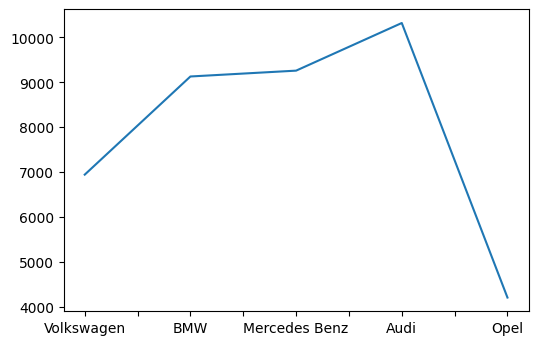

In [233]:
mean_price_per_brand_top.plot(kind = 'line')

The chart above shows the average price of 5 brands ranked in descending order of frequency.

In [234]:
mpb_top_series = pd.Series(mean_price_per_brand_top.sort_values(ascending=False))
print(mpb_top_series)

Audi             10320
Mercedes Benz     9260
BMW               9130
Volkswagen        6946
Opel              4211
Name: mean_price, dtype: int64


In [235]:
print('The top brand frequency in the sale is next:\n'
,top_5_brands\
,'.\nThe top price is next:\n'
,mpb_top_series.index\
,".\nIt's clear that there is not direct colleration between amount of cars\
in the sale and its starting price.\nThe reason of seller's requests must lay something else.")

The top brand frequency in the sale is next:
 Index(['Volkswagen', 'BMW', 'Mercedes Benz', 'Audi', 'Opel'], dtype='object') .
The top price is next:
 Index(['Audi', 'Mercedes Benz', 'BMW', 'Volkswagen', 'Opel'], dtype='object') .
It's clear that there is not direct colleration between amount of carsin the sale and its starting price.
The reason of seller's requests must lay something else.


*Bottom 5 brand*

In [236]:
bottom_5_brands = (autos_2['brand'].value_counts(normalize=True,dropna=False).tail().index)
print(bottom_5_brands)

Index(['Daewoo', 'Rover', 'Lancia', 'Lada', 'Trabant'], dtype='object')


In [237]:
mean_price_per_brand_bottom= {}

for brand in bottom_5_brands:
    mean_price = autos_2.loc[autos_2['brand'] == brand,'price_$'].mean()
    mean_price_per_brand_bottom[brand] = int(round(mean_price,0))

mean_price_per_brand_bottom = pd.Series(mean_price_per_brand_bottom, name='mean_price')

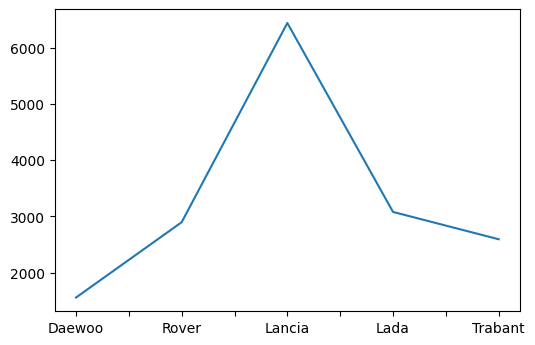

In [238]:
mean_price_per_brand_bottom.plot(kind = 'line')

The chart above shows the average price of 5 brands ranked in descending order of frequency.

In [239]:
mpb_bottom_series = pd.Series(mean_price_per_brand_bottom.sort_values(ascending=False))
print(mpb_bottom_series)

Lancia     6440
Lada       3079
Rover      2896
Trabant    2593
Daewoo     1556
Name: mean_price, dtype: int64


In [240]:
print('The bottom brand frequency in the sale is next:\n'
,bottom_5_brands\
,'.\nThe bottom price is next:\n'
,mpb_bottom_series.index\
,".\nIt's clear that there is not direct colleration between amount of cars\
in the sale and its starting price.\nThe reason of seller's requests must lay something else.")

The bottom brand frequency in the sale is next:
 Index(['Daewoo', 'Rover', 'Lancia', 'Lada', 'Trabant'], dtype='object') .
The bottom price is next:
 Index(['Lancia', 'Lada', 'Rover', 'Trabant', 'Daewoo'], dtype='object') .
It's clear that there is not direct colleration between amount of carsin the sale and its starting price.
The reason of seller's requests must lay something else.


*Comparison of the average price between "top" and "lower" brands (respectively, its frequency in sales)*

In [241]:
# to demonstrate the meaning of actions let's go gradually
# 1. Sum of mean top 5 price in series above:
mean_price_top_sum = mpb_top_series.sum()
# 2. the length of the series:
len(mpb_top_series)
# 3. the average value of series top 5 prices:
average_top_price = mean_price_top_sum / len(mpb_top_series)
# and print the result
print("The average price in the top of brand sales is", average_top_price, "dollars")

The average price in the top of brand sales is 7973.4 dollars


In [242]:
# the same for the infrequent cars in two lines:
average_bottom_price = mpb_bottom_series.sum() / len(mpb_bottom_series)
print("The average price in the bottom of brand sales is", average_bottom_price, "dollars")

The average price in the bottom of brand sales is 3312.8 dollars


In [243]:
# just to print the conclusion in a pretty way, we can see clear the conclusion visually
print('As a result of the current analysis, we see:')
if average_bottom_price > average_top_price:
    print('Scarce cars cost more.')
elif average_bottom_price < average_top_price:
    print('The rarity of cars on sale does not make them more expensive.')    
else:
    print('No difference in price between scarce and regular cars.')    

As a result of the current analysis, we see:
The rarity of cars on sale does not make them more expensive.


**Step C.2. Correlation between price and brand name**\
*Or what brand is the most expensive*

In [244]:
# prepare data for the diagramm (average price per brand frequency)
freq_brand = (autos_2['brand'].value_counts(normalize=True,dropna=False).index)
print(freq_brand)

Index(['Volkswagen', 'BMW', 'Mercedes Benz', 'Audi', 'Opel', 'Ford', 'Renault',
       'Peugeot', 'Fiat', 'Skoda', 'SEAT', 'Smart', 'Toyota', 'Mazda',
       'Citroen', 'Nissan', 'Hyundai', 'MINI', 'Volvo', 'Kia',
       'Sonstige Autos', 'Honda', 'Porsche', 'Mitsubishi', 'Chevrolet',
       'Alfa Romeo', 'Suzuki', 'Dacia', 'Chrysler', 'Jeep', 'Land Rover',
       'Jaguar', 'Subaru', 'Daihatsu', 'SAAB', 'Daewoo', 'Rover', 'Lancia',
       'Lada', 'Trabant'],
      dtype='object')


In [246]:
mean_price_per_brand= {}

for brand in freq_brand:
    mean_price = autos_2.loc[autos_2['brand'] == brand,'price_$'].mean()
    mean_price_per_brand[brand] = round(mean_price,0)

mean_price_per_brand = pd.Series(mean_price_per_brand, name='mean_price')
print(mean_price_per_brand.head(10))

Volkswagen        6946.0
BMW               9130.0
Mercedes Benz     9260.0
Audi             10320.0
Opel              4211.0
Ford              5499.0
Renault           3493.0
Peugeot           3968.0
Fiat              3946.0
Skoda             6832.0
Name: mean_price, dtype: float64


In [247]:
mpb_freq_series = pd.Series(mean_price_per_brand.sort_values(ascending=False))
print(mpb_freq_series.head())

Porsche           45106.0
Land Rover        18760.0
Sonstige Autos    14426.0
Jeep              12188.0
Jaguar            11747.0
Name: mean_price, dtype: float64


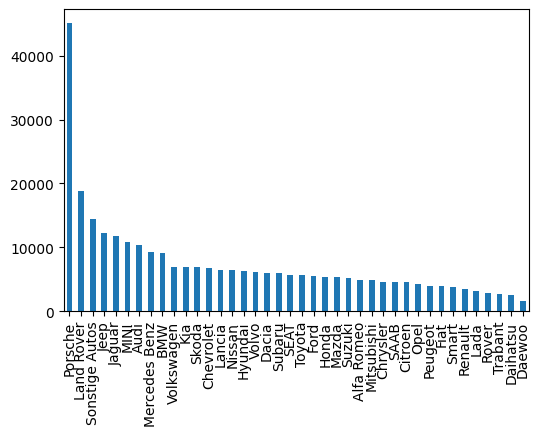

In [248]:
mpb_freq_series.plot(kind = 'bar')

In [249]:
print('The most expensive brand is:\n',dict(mpb_freq_series.head(1)))

The most expensive brand is:
 {'Porsche': 45106.0}


In [250]:
print("The cheapest brand is:\n", dict(mpb_freq_series.tail(1)))

The cheapest brand is:
 {'Daewoo': 1556.0}


It must be remembered that these two polar brands belong to completely different classes of cars.\
The middle of the chart shows that there are many brands that cost about the same.

**Step C.3. Correlation between price and condition of cars**

Let's try to find a correlation between the starting price and the condition of cars in sales.

In [251]:
autos_2['unrepaired_damage'].describe()

count     35669
unique        3
top          No
freq      28785
Name: unrepaired_damage, dtype: object

In [252]:
condition_counts = autos_2['unrepaired_damage'].value_counts(normalize=True, dropna = False)*100
print(condition_counts)

No         80.700328
Unknown    13.101012
Yes         6.198660
Name: unrepaired_damage, dtype: float64


We know that there are tree unique values in the data:
- 'No' - a car is in normal condition, at least can be repaired;
- 'Unknown' - a condition of a car is unknown;
- 'Yes' - a car was ruined and has any damage.

In [253]:
# let's use the same method from above:
# assign a variable to the machines state
car_condition = autos_2['unrepaired_damage'].unique()

In [254]:
# calculate the average price fro each condition:
mean_price_per_condition= {}

for c in car_condition:
    mean_price = autos_2.loc[autos_2['unrepaired_damage'] == c,'price_$'].mean()
    mean_price_per_condition[c] = round(mean_price,0)

mean_price_per_condition = pd.Series(mean_price_per_condition, name='mean_price')
print(mean_price_per_condition)

No         8008.0
Unknown    4997.0
Yes        4364.0
Name: mean_price, dtype: float64


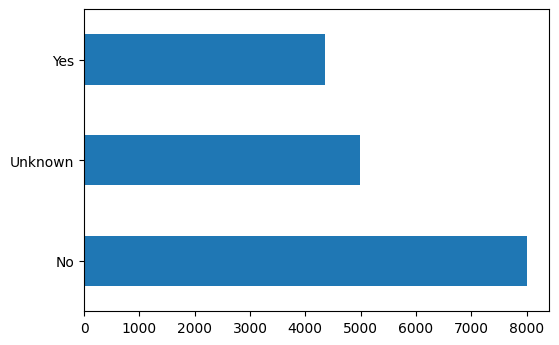

In [255]:
mean_price_per_condition.plot(kind = 'barh')

The chart above shows the average price of cars in different condition.

In [256]:
mp_no_damage = round(mean_price_per_condition.max())
print('The average price of cars in good condition is', mp_no_damage, "dollars")

The average price of cars in good condition is 8008.0 dollars


In [257]:
mp_with_damage = round(mean_price_per_condition.min())
print("The average price of cars with unrepaired damages is", mp_with_damage, "dollars")

The average price of cars with unrepaired damages is 4364.0 dollars


In [258]:
# print the conclusion:
print('As a result of the current analysis, we see:')
if (mp_no_damage / mp_with_damage) > 1:
    print('Cars in good condition cost more.')
elif (mp_no_damage / mp_with_damage) < 1:
    print("The condition of the car doesn't matter.")    
else:
    print('There is no difference in price between cars in good condition and those with defects.')    

As a result of the current analysis, we see:
Cars in good condition cost more.


**Step C.4. Correlation between price and car age**

In [259]:
print("Here is the average price for the 10 most common age car categories sorted by age:")
age_top_10 = autos_1['age_car'].unique()[:10]
ages_10 = autos_1[autos_1['age_car'].isin(age_top_10)]
round(ages_10.groupby('age_car')["price_$"].mean())

Here is the average price for the 10 most common age car categories sorted by age:


age_car
6     12869.0
7     10456.0
9      7962.0
10     6558.0
12     4717.0
13     3827.0
17     2448.0
18     2917.0
19     2735.0
26     4693.0
Name: price_$, dtype: float64

The result looks interesting, it shows that the more often cars in sales are 6 years old.\
However, we are working with the extracted part of the original data which covers about the month, so we cannot fully trust our result.\
In addition we would like to know if the older cars are more expensive or otherwise they are cheaper,\
no matter how often they can be met in sales.
So let's try the previous technique again.

*Let's look at cars from 1 to 10 years old.*

In [260]:
top_10_ages = sorted(autos_2['age_car'].unique())[:10]
print(top_10_ages)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [261]:
mean_price_per_age_top= {}

for age in top_10_ages:
    mean_price = autos_2.loc[autos_2['age_car'] == age,'price_$'].mean()
    mean_price_per_age_top[age] = int(round(mean_price,0))

mean_price_per_age_top = pd.Series(mean_price_per_age_top, name='mean_price')
print(mean_price_per_age_top)

1     29117
2     22123
3     19691
4     16814
5     14731
6     12869
7     10456
8      9589
9      7962
10     6558
Name: mean_price, dtype: int64


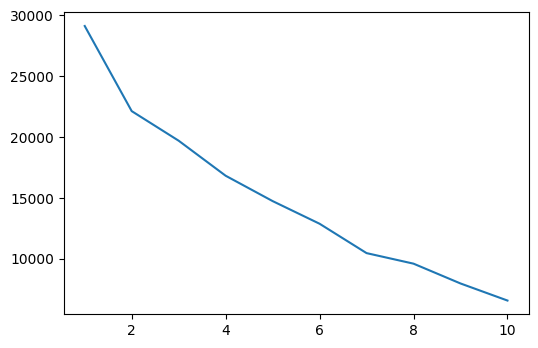

In [262]:
mean_price_per_age_top.plot(kind = 'line')

In the chart above, we can see that the average price drops very noticeable as the car ages.

*Now let's look at oldest cars in sales.*

In [263]:
bottom_10_ages = sorted(autos_2['age_car'].unique())[-10:]
print(bottom_10_ages)

[48, 49, 50, 51, 53, 54, 55, 56, 57, 58]


In [264]:
mean_price_per_age_bottom= {}

for age in bottom_10_ages:
    mean_price = autos_2.loc[autos_2['age_car'] == age,'price_$'].mean()
    mean_price_per_age_bottom[age] = int(round(mean_price,0))

mean_price_per_age_bottom = pd.Series(mean_price_per_age_bottom, name='mean_price')
print(mean_price_per_age_bottom)

48    14661
49    19042
50    16519
51     8320
53    12758
54     1200
55    22900
56    12500
57    25100
58     3800
Name: mean_price, dtype: int64


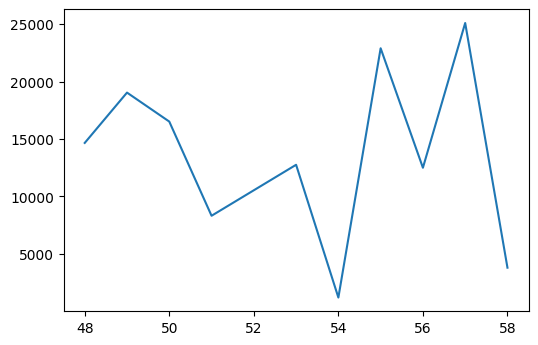

In [265]:
mean_price_per_age_bottom.plot(kind = 'line')

The chart above shows that for the oldest cars the average price is not stable as the car ages.\
This can be explained by the fact that we do not have enough elements in the oldest cars dataset to analyze.\
The only way is to compare the average price of both age categories.

In [266]:
mp_age_top = mean_price_per_age_top.mean()
print('The average price of newest cars is', mp_age_top, "dollars")

The average price of newest cars is 14991.0 dollars


In [267]:
mp_age_bottom = mean_price_per_age_bottom.mean()
print("The average price of oldest cars is", mp_age_bottom, "dollars")

The average price of oldest cars is 13680.0 dollars


In [268]:
# print the conclusion:
print('The current analysis showed:')
if (mp_age_top / mp_age_bottom) > 1:
    print('New cars are more expensive.')
elif (mp_age_bottom / mp_age_top) < 1:
    print("The oldest cars cost more.")    
else:
    print('The age of the cars does not affect the price.') 

The current analysis showed:
New cars are more expensive.


**Step C.5. Correlation between price and mileage of a car**

In [269]:
# It seems the values in the "odometer_km" are taken from the dictionary:
mileage_counts = round((autos_2['odometer_km'].value_counts(normalize=True, dropna = False)*100), 2)
print(mileage_counts)
print("There are", len(mileage_counts), 'car categories taken by mileage.')

150000    61.44
125000    11.53
100000     4.92
90000      4.15
80000      3.48
70000      3.01
60000      2.83
50000      2.56
40000      2.04
30000      1.81
20000      1.52
10000      0.47
5000       0.24
Name: odometer_km, dtype: float64
There are 13 car categories taken by mileage.


In [270]:
mileages = sorted(autos_2['odometer_km'].unique())
print(mileages)

[5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000]


In [271]:
mean_price_per_mileage= {}

for ma in mileages:
    mean_price = autos_2.loc[autos_2['odometer_km'] == ma,'price_$'].mean()
    mean_price_per_mileage[ma] = int(round(mean_price,0))

mean_price_per_mileage = pd.Series(mean_price_per_mileage, name='mean_price')
print(mean_price_per_mileage)

5000      30557
10000     26568
20000     22256
30000     18377
40000     16334
50000     14209
60000     12989
70000     11506
80000     10337
90000      9214
100000     9033
125000     7396
150000     4996
Name: mean_price, dtype: int64


In [272]:
mp_mileage_series = pd.Series(mean_price_per_mileage.sort_values())

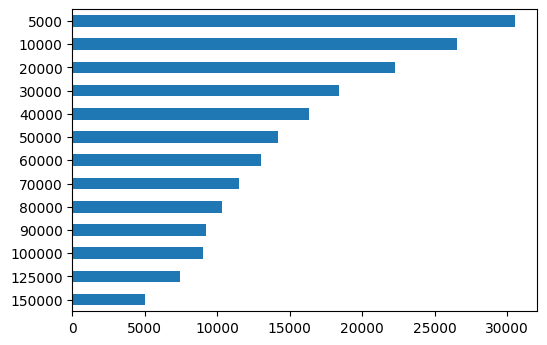

In [273]:
mp_mileage_series.plot(kind = 'barh')

The chart above shows that the more the car has been on the road, the cheaper it is.

In [274]:
ma_5000 = mean_price_per_mileage.max()
ma_150000 = mean_price_per_mileage.min()

In [275]:
# print the conclusion:
print('The current analysis shows:')
if ma_5000 > ma_150000:
    print('Cars with lower mileage cost more.')
elif ma_5000 < ma_150000:
    print("The more the car is on the road, the more it costs.")    
else:
    print('Mileage does not affect the price of the car.') 

The current analysis shows:
Cars with lower mileage cost more.


**Step C.6. Correlation between price and vehicle type**

In [276]:
vtype_counts = round((autos_2['vehicle_type'].value_counts(normalize=True, dropna = False)*100),2) 
print(vtype_counts)
print("There are", len(vtype_counts),\
      "vehicle types in the dataset, and they seems are taken from the dictionary.\nThis fact \
makes our work more simple")

sedan           28.90
estate_wagon    20.87
small_car       18.77
bus             10.23
convertible      7.65
coupe            5.73
suv              5.26
unknown          1.84
other            0.75
Name: vehicle_type, dtype: float64
There are 9 vehicle types in the dataset, and they seems are taken from the dictionary.
This fact makes our work more simple


In [277]:
vtypes = sorted(autos_2['vehicle_type'].unique())
print(vtypes)

['bus', 'convertible', 'coupe', 'estate_wagon', 'other', 'sedan', 'small_car', 'suv', 'unknown']


In [278]:
mean_price_per_vtypes= {}

for vt in vtypes:
    mean_price = autos_2.loc[autos_2['vehicle_type'] == vt,'price_$'].mean()
    mean_price_per_vtypes[vt] = int(round(mean_price,0))

mean_price_per_vtypes = pd.Series(mean_price_per_vtypes, name='mean_price')
print(mean_price_per_vtypes)

bus              7461
convertible     10942
coupe           12498
estate_wagon     6898
other            5299
sedan            7087
small_car        3909
suv             13565
unknown          5243
Name: mean_price, dtype: int64


In [279]:
mp_vt_series = pd.Series(mean_price_per_vtypes.sort_values())

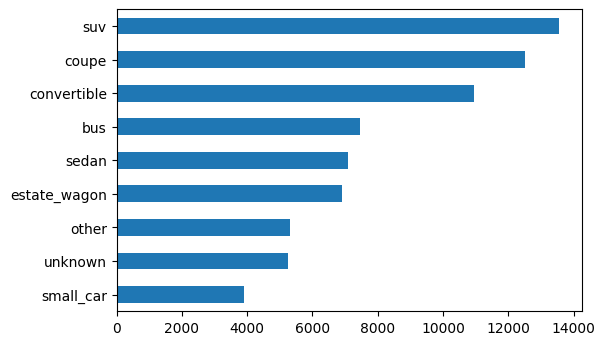

In [280]:
mp_vt_series.plot(kind = 'barh' )

In [281]:
print('The chart above shows that:\nThe most expensive vehicle \
type is:\n',dict(mp_vt_series.tail(1)),'\nThe cheapest vehicle type is:\n',dict(mp_vt_series.head(1)))

The chart above shows that:
The most expensive vehicle type is:
 {'suv': 13565} 
The cheapest vehicle type is:
 {'small_car': 3909}


In [282]:
mp_vt_series_mean = round(mp_vt_series.mean())
mp_vt_series_max = mp_vt_series.max()
mp_vt_series_min = mp_vt_series.min()

In [283]:
prop_max = round((mp_vt_series_max / mp_vt_series_mean), 2)*100
prop_min = round((mp_vt_series_min / mp_vt_series_mean), 2)*100

In [284]:
print("The price of the more expensive type of vehicle is",prop_max, "% of average price.\nThe price \
of the cheapest type of vehicle is",prop_min, "% of average price")

The price of the more expensive type of vehicle is 167.0 % of average price.
The price of the cheapest type of vehicle is 48.0 % of average price


**Step C.7. Relationship between price and engine power**

In [285]:
power_counts = round((autos_2['power_ps'].value_counts(normalize=True, dropna = False)*100), 2)
print(power_counts)
print("There are", len(power_counts), 'car categories taken by engine power in horsepowers.')

0        6.41
75       5.10
140      4.76
150      4.69
170      3.73
         ... 
490      0.00
362      0.00
42       0.00
10       0.00
16312    0.00
Name: power_ps, Length: 396, dtype: float64
There are 396 car categories taken by engine power in horsepowers.


In [286]:
power_sorted = sorted(autos_2['power_ps'].unique())
print('Top motor power:',power_sorted[:10],'\nBottom motor power:', power_sorted[-10:])

Top motor power: [0, 2, 3, 4, 5, 6, 8, 9, 10, 11] 
Bottom motor power: [4400, 5867, 6045, 6226, 6512, 7511, 14009, 15001, 16312, 17700]


If we look at the line above, we can see that there are values from 0 to 17700 PS in the data.\
A brief study shows that the power of 1014 PS in 2017 was a fantastic achievement:\
[Autonews](https://www.autonews.ru/news/58fda6669a794773bdfaef45) \
Some more googling of luxury car specs showed values above 740hp. must be incorrect:\
[Luxury_cars](https://www.auto24-krd.ru/avtonovosti-krasnodara-i-yuga-rf/4838-avtomobili-premium-klassa.html)\
Determining the lower limit is not easy. For example, Daewoo Matiz has 63 HP:\
[UZ-Daewoo](https://www.uzdaewoo.ru/auto/matiz/description/)\
Assume values below 60hp. are also incorrect.\
To avoid destroying our previous results, let's not delete rows from the dataset, but let's not include invalid data in the analysis either.

In [287]:
selected_power = autos_2[autos_2['power_ps'].between(60,740)][['price_$', 'power_ps']]
print(selected_power)
print("There are",len(autos_2) - len(selected_power),"values in the 'power_ps' column that don't appear to be true.")

       price_$  power_ps
0         5000       158
1         8500       286
2         8990       102
3         4350        71
5         7900       150
...        ...       ...
35664    24900       239
35665     1980        75
35666    13200        69
35667    22900       150
35668     1250       101

[32187 rows x 2 columns]
There are 3482 values in the 'power_ps' column that don't appear to be true.


In [288]:
selected_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32187 entries, 0 to 35668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price_$   32187 non-null  int64
 1   power_ps  32187 non-null  int64
dtypes: int64(2)
memory usage: 754.4 KB


In [289]:
# attempt to group the data
ps_mp_categories = round((selected_power.groupby('power_ps')['price_$'].mean()), 2)
mp_ps_categories = pd.Series(ps_mp_categories.sort_index())
print(mp_ps_categories.sample(20).sort_index(),\
      '\nThere are', len(mp_ps_categories), 'categories taken by hp.')

power_ps
87      5428.20
92      5729.38
103     3075.76
116     4363.89
127     7226.33
129     5744.14
149     9675.00
173     8130.62
176     5141.67
209     8295.10
224    13358.52
236     1000.00
249    13033.00
252    15230.00
277     8950.00
322    15900.00
345    39218.36
380    26663.33
564    42000.00
587    44900.00
Name: price_$, dtype: float64 
There are 323 categories taken by hp.


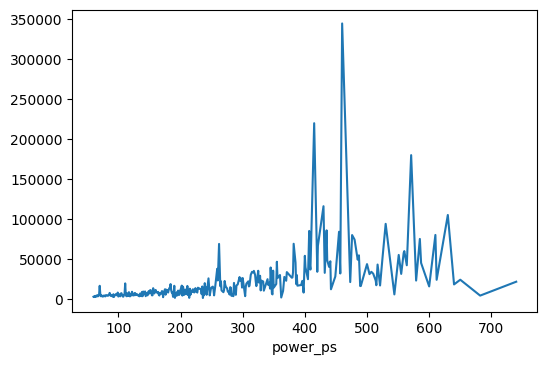

In [290]:
mp_ps_categories.plot(kind = 'line')

The chart above shows that there is any tendency in relatioship between price and motor power, but it is not clear.\
Let's create bigger groups:
- range 60-100 PS = '100hp&less'
- range 101-200 PS = '101-200hp'
- range 201-300 PS = '201-300hp'
- range 301-400 PS = '301-400hp'
- range 401-500 PS = '401-500hp'
- range 501-600 PS = '501-600hp'
- range 601-700 PS = '601-700hp'
- range 701-740 PS = '700hp&more'

In [291]:
bins = [59, 100, 200, 300, 400, 500, 600, 700, 740]
group_names = ['100hp&less', '101-200hp', '201-300hp', '301-400hp', '401-500hp', '501-600hp', '601-700hp', '700hp&more']
selected_power['ps_group'] = pd.cut(selected_power['power_ps'], bins, labels = group_names)
ps_group = selected_power['ps_group'].unique()
print(ps_group)

[101-200hp, 201-300hp, 100hp&less, 301-400hp, 401-500hp, 501-600hp, 601-700hp, 700hp&more]
Categories (8, object): [100hp&less < 101-200hp < 201-300hp < 301-400hp < 401-500hp < 501-600hp < 601-700hp < 700hp&more]


In [292]:
power_mp = {}

for key in ps_group:
    power_mp[key] = round((selected_power.loc[selected_power['ps_group'] == key, 'price_$'].mean()), 2)
    
print("Now we got the average price for categories of cars taken by motor power:")
power_mp

Now we got the average price for categories of cars taken by motor power:


{'101-200hp': 7259.32,
 '201-300hp': 15087.47,
 '100hp&less': 3895.79,
 '301-400hp': 25136.78,
 '401-500hp': 49735.15,
 '501-600hp': 42913.85,
 '601-700hp': 42449.5,
 '700hp&more': 21400.0}

In [293]:
# sorting by index
mp_power_series = pd.Series(power_mp, name='ps_group').sort_index()
print(mp_power_series)

100hp&less     3895.79
101-200hp      7259.32
201-300hp     15087.47
301-400hp     25136.78
401-500hp     49735.15
501-600hp     42913.85
601-700hp     42449.50
700hp&more    21400.00
Name: ps_group, dtype: float64


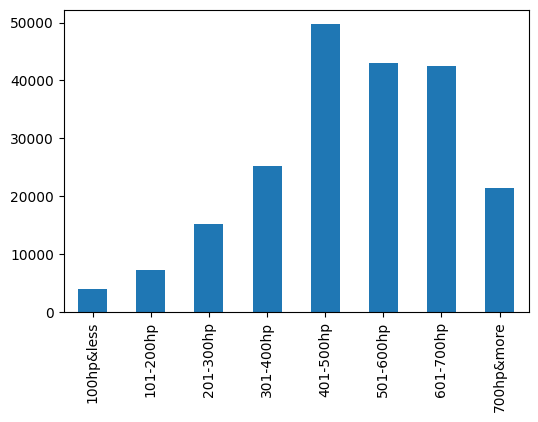

In [294]:
mp_power_series.plot(kind = 'bar')

The chart above shows that, in general, cars with more powerful engines cost more than with less powerful ones.\
However, the highest average price falls on the average groups of cars.

In [295]:
mp_ps_mean = round((mp_power_series.mean()), 0)
mp_ps_100 = mp_power_series.get('100hp&less')
mp_ps_200 = mp_power_series.get('101-200hp')
mp_ps_300 = mp_power_series.get('201-300hp')
mp_ps_400 = mp_power_series.get('301-400hp')
mp_ps_500 = mp_power_series.get('401-500hp')
mp_ps_600 = mp_power_series.get('501-600hp')
mp_ps_700 = mp_power_series.get('601-700hp')
mp_ps_over_700 = mp_power_series.get('700hp&more')

prop_ps_100 = round(((mp_ps_100 / mp_ps_mean)*100), 2)
prop_ps_200 = round(((mp_ps_200 / mp_ps_mean)*100), 2)
prop_ps_300 = round(((mp_ps_300 / mp_ps_mean)*100), 2)
prop_ps_400 = round(((mp_ps_400 / mp_ps_mean)*100), 2)
prop_ps_500 = round(((mp_ps_500 / mp_ps_mean)*100), 2)
prop_ps_600 = round(((mp_ps_600 / mp_ps_mean)*100), 2)
prop_ps_700 = round(((mp_ps_700 / mp_ps_mean)*100), 2)
prop_ps_over_700 = round(((mp_ps_over_700 / mp_ps_mean)*100), 2)

print("Here is the percentage of the price of a cars with a difference in engine power from the average selling price:\
\n\nup to 100hp.:",prop_ps_100,"%" \
"\n101-200hp.:",prop_ps_200, "%"\
"\n201-300hp.:",prop_ps_300, "%"\
"\n301-400hp.:",prop_ps_400, "%"\
"\n401-500hp.:",prop_ps_500, "%"\
"\n501-600hp.:",prop_ps_600, "%"\
"\n601-700hp.:",prop_ps_700, "%"\
"\nOver 700hp.:",prop_ps_over_700, "%")

Here is the percentage of the price of a cars with a difference in engine power from the average selling price:

up to 100hp.: 14.99 %
101-200hp.: 27.94 %
201-300hp.: 58.06 %
301-400hp.: 96.74 %
401-500hp.: 191.4 %
501-600hp.: 165.15 %
601-700hp.: 163.36 %
Over 700hp.: 82.36 %


**Step C.8. Statistic analysis**

In this section we will gather some statistic about GearBoxs & Fuel Types.
For information:
- "gearbox" is an transmission,
- fuel type 'cn_gas' mentions compressed natural gas, CNG (not chloracetophenone (CN or tear gas)),
- fuel type "other" probably indicates an alternative motor fuel, so it can be left in the data:\
[Motor fuel](https://en.wikipedia.org/wiki/Motor_fuel#:~:text=Currently%2C%20the%20majority%20of%20motor,using%20fuel%20cells%20or%20combustion).

*Step C.8.1. GearBox Statistics*

In [296]:
gb_counts = round((autos_2['gearbox'].value_counts(normalize=True, dropna = False)*100), 2)
print(gb_counts)
print("There are", len(gb_counts), 'car categories taken by gearbox type')

manual       72.11
automatic    24.78
unknown       3.11
Name: gearbox, dtype: float64
There are 3 car categories taken by gearbox type


In [297]:
gb_unique = autos_2['gearbox'].unique()

av_price_per_grtype= {}

for gbtype in gb_unique:
    mean_price = autos_2.loc[autos_2['gearbox'] == gbtype,'price_$'].mean()
    av_price_per_grtype[gbtype] = int(round(mean_price,0))

av_price_per_grtype = pd.Series(av_price_per_grtype, name='mean_price').sort_values()
print(av_price_per_grtype)

unknown       5039
manual        5998
automatic    11727
Name: mean_price, dtype: int64


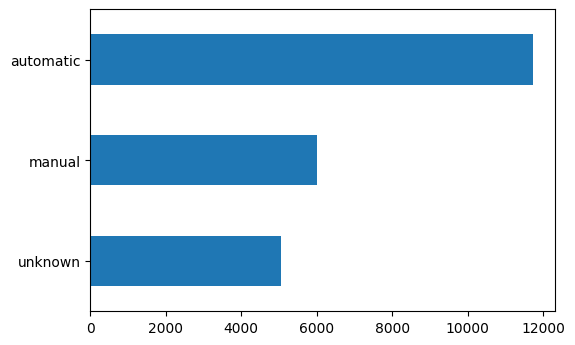

In [298]:
av_price_per_grtype.plot(kind = 'barh')

In [299]:
print('The chart above shows that:\n-the most expensive vehicle with \
type of gearbox:\n',dict(av_price_per_grtype.tail(1)),'\n-the cheapest vehicle with type \
of gearbox:\n',dict(av_price_per_grtype.head(1)))

The chart above shows that:
-the most expensive vehicle with type of gearbox:
 {'automatic': 11727} 
-the cheapest vehicle with type of gearbox:
 {'unknown': 5039}


In [300]:
mp_gb_automatic = av_price_per_grtype.get('automatic')
mp_gb_manual = av_price_per_grtype.get('manual')
prop_gb = round((mp_gb_automatic / mp_gb_manual), 2)*100
print("The price of an vehicle with automatic gearbox is",prop_gb, "% of the price \
of the vehicle with manual gearbox")

The price of an vehicle with automatic gearbox is 196.0 % of the price of the vehicle with manual gearbox


*Step C.8.2. Fuel Type Statistics*

In [301]:
ft_counts = round((autos_2['fuel_type'].value_counts(normalize=True, dropna = False)*100), 2)
print(ft_counts)
print("There are", len(ft_counts), 'car categories taken by fuel type')

gasoline        57.29
diesel          36.75
unknown          4.14
tractor_fuel     1.51
cn_gas           0.16
hybrid           0.10
electricity      0.03
other            0.02
Name: fuel_type, dtype: float64
There are 8 car categories taken by fuel type


In [302]:
ft_unique = autos_2['fuel_type'].unique()

av_price_per_ftype= {}

for ft in ft_unique:
    mean_price = autos_2.loc[autos_2['fuel_type'] == ft,'price_$'].mean()
    av_price_per_ftype[ft] = int(round(mean_price,0))

av_price_per_ftype = pd.Series(av_price_per_ftype, name='mean_price').sort_values()
print(av_price_per_ftype)

tractor_fuel     4902
other            5058
unknown          5157
cn_gas           5806
gasoline         6551
diesel           9029
electricity     11766
hybrid          14689
Name: mean_price, dtype: int64


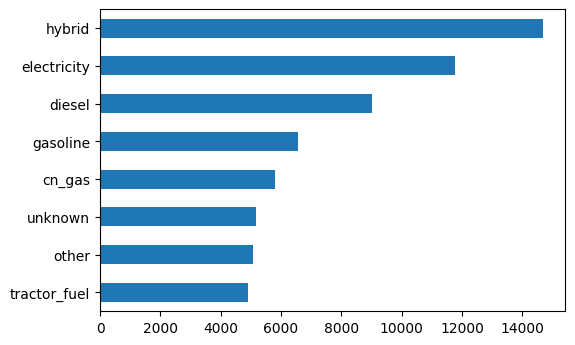

In [303]:
av_price_per_ftype.plot(kind = 'barh')

In [304]:
print('The chart above shows that:\n-the most expensive vehicle type which work \
on:\n',dict(av_price_per_ftype.tail(1)),'\n-the cheapest vehicle type which work \
on:\n',dict(av_price_per_ftype.head(1)))

The chart above shows that:
-the most expensive vehicle type which work on:
 {'hybrid': 14689} 
-the cheapest vehicle type which work on:
 {'tractor_fuel': 4902}


In [305]:
mp_ft_mean = round((av_price_per_ftype.mean()), 3)
mp_ft_hybrid = av_price_per_ftype.get('hybrid')
mp_ft_electricity = av_price_per_ftype.get('electricity')
mp_ft_diesel = av_price_per_ftype.get('diesel')
mp_ft_gasoline = av_price_per_ftype.get('gasoline')
mp_ft_cn_gas = av_price_per_ftype.get('cn_gas')

prop_ft_h = round((mp_ft_hybrid / mp_ft_mean), 3)*100
prop_ft_e = round((mp_ft_electricity / mp_ft_mean), 3)*100
prop_ft_d = round((mp_ft_diesel / mp_ft_mean), 3)*100
prop_ft_g = round((mp_ft_gasoline / mp_ft_mean), 3)*100
prop_ft_cng = round((mp_ft_cn_gas / mp_ft_mean), 3)*100
print("The price of an vehicle type using hybrid fuel is",prop_ft_h, "% of the average sales price.\
\nThe price of an vehicle type using electricity as fuel is",prop_ft_e, "% of the average sales price.\
\nThe price of an vehicle type using diesel fuel is",prop_ft_d, "% of the average sales price.\
\nThe price of an vehicle type using gasoline fuel is",prop_ft_g, "% of the average sales price.\
\nThe price of an vehicle type using CNG fuel is",prop_ft_cng, "% of the average sales price.")

The price of an vehicle type using hybrid fuel is 186.7 % of the average sales price.
The price of an vehicle type using electricity as fuel is 149.5 % of the average sales price.
The price of an vehicle type using diesel fuel is 114.7 % of the average sales price.
The price of an vehicle type using gasoline fuel is 83.2 % of the average sales price.
The price of an vehicle type using CNG fuel is 73.8 % of the average sales price.


**Step C.9. The most common brand\model combinations in sales**

In [306]:
brand_counts = round((autos_2['brand'].value_counts(normalize=True, dropna = False)*100), 2)
print("There are", len(brand_counts), 'brand names mentioned in the dataset.')

There are 40 brand names mentioned in the dataset.


In [307]:
model_counts = round((autos_2['model'].value_counts(normalize=True, dropna = False)*100), 2)
print("There are", len(model_counts), 'model names mentioned in the dataset.')

There are 238 model names mentioned in the dataset.


In [308]:
# Here we found that the "model" column is left raw
model_unique = sorted(autos_2['model'].unique())
print(model_unique[150:160])

['Picanto', 'Polo', 'Primera', 'Punto', 'Q3', 'Q5', 'Q7', 'Qashqai', 'R19', 'Range Rover']


In [309]:
# let's combine the model and brand names in the new "brand_model" column
autos_2['brand_model'] = autos_2['brand'] + ' : ' + autos_2['model']
br_mod_counts = round((autos_2['brand_model'].value_counts(normalize=True, dropna = False)*100), 3)
print("There are", len(br_mod_counts), 'brand&model combinations mentioned in the dataset.')

There are 325 brand&model combinations mentioned in the dataset.


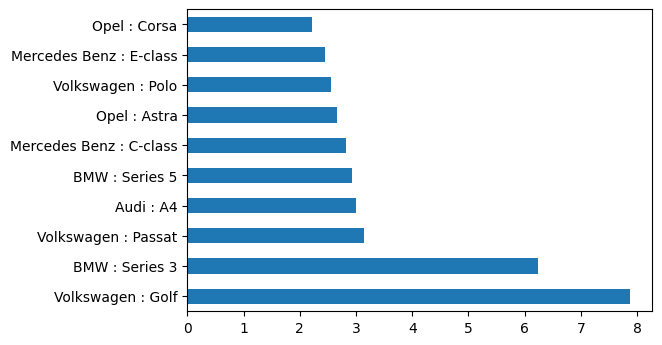

In [310]:
br_mod_counts.head(10).plot(kind = 'barh')

In [311]:
print('Here is 10 most common combination of brand\model names in sales:\n\n'\
,br_mod_counts.head(10))

Here is 10 most common combination of brand\model names in sales:

 Volkswagen : Golf          7.878
BMW : Series 3             6.244
Volkswagen : Passat        3.140
Audi : A4                  3.005
BMW : Series 5             2.921
Mercedes Benz : C-class    2.826
Opel : Astra               2.663
Volkswagen : Polo          2.554
Mercedes Benz : E-class    2.442
Opel : Corsa               2.220
Name: brand_model, dtype: float64


## Conclusion

**Chapter A.**\
In this chapter, we looked at various methods for reading and understanding the information contained in a given CSV file.\
We also learned that Python provides methods to make source file columns more readable.\
In addition, the code line was writeen with authomatic statistic print.\
As a resolution to this chapter, we have outlined further work in the form of a plan. 

**Chapter B.**\
In this chapter, we have learned Python methods for working with raw information in a given file.\
The data set can be cleaned from incorrect and strange data.\
We learned how to convert strings to numeric and datatime format, and processed part of the data with functions.\
We've looked at methods for adding and removing columns in a source data file.\\
As a final preparation, we saved the dataset in a new data file and reordered the columns in a more logical order.

**Chapter C.**\
In this chapter, Python methods for data analysis have been explored:
- various types of aggregation and grouping,
- statistical and mathematical operations,
- visualization
- and so on.\

Since this dataset is an extracted part of the original data and was prepared specifically for this project,\
the results of the analysis in the reality may differ from the results of the current project.

*There is the list of the analysis results:*

In [312]:
print('C.1.\nThe result of the research "Correlation between price and frequency of brand appearance in sales" shows:')
if average_bottom_price > average_top_price:
    print('Scarce cars cost more.')
elif average_bottom_price < average_top_price:
    print('The rarity of cars on sale does not make them more expensive.')    
else:
    print('No difference in price between scarce and regular cars.')  

C.1.
The result of the research "Correlation between price and frequency of brand appearance in sales" shows:
The rarity of cars on sale does not make them more expensive.


In [313]:
print('C.2.\nThe result of the analysis "Correlation between price and brand\
name" shows:\n-The most expensive brand is:\n',dict(mpb_freq_series.head(1))\
,"\n-The cheapest brand is:\n",dict(mpb_freq_series.tail(1)))

C.2.
The result of the analysis "Correlation between price and brandname" shows:
-The most expensive brand is:
 {'Porsche': 45106.0} 
-The cheapest brand is:
 {'Daewoo': 1556.0}


In [314]:
print('C.3.\nThe result of the analysis "Correlation between price and condition of cars" shows:')
if (mp_no_damage / mp_with_damage) > 1:
    print('Cars in good condition cost more.')
elif (mp_no_damage / mp_with_damage) < 1:
    print("The condition of the car doesn't matter.")    
else:
    print('There is no difference in price between cars in good condition and those with defects.')    

C.3.
The result of the analysis "Correlation between price and condition of cars" shows:
Cars in good condition cost more.


In [315]:
print('C.4.\nThe result of the analysis "Correlation between price and car age" shows:')
if (mp_age_top / mp_age_bottom) > 1:
    print('New cars are more expensive.')
elif (mp_age_bottom / mp_age_top) < 1:
    print("The oldest cars cost more.")    
else:
    print('The age of the cars does not affect the price.') 

C.4.
The result of the analysis "Correlation between price and car age" shows:
New cars are more expensive.


In [316]:
print('C.5.\nThe result of analysis "Correlation between price and mileage of a car" shows:')
if ma_5000 > ma_150000:
    print('Cars with lower mileage cost more.')
elif ma_5000 < ma_150000:
    print("The more the car is on the road, the more it costs.")    
else:
    print('Mileage does not affect the price of the car.') 

C.5.
The result of analysis "Correlation between price and mileage of a car" shows:
Cars with lower mileage cost more.


In [317]:
print('C.6.\nThe result of analysis "Correlation between price and vehicle type \
shows that:\n-The most expensive vehicle \
type is:\n',dict(mp_vt_series.tail(1)),'\n-The cheapest vehicle type is:\n',\
dict(mp_vt_series.head(1)),"\nThe price of the more expensive type of vehicle is",prop_max, "% of average price.\nThe price \
of the cheapest type of vehicle is",prop_min, "% of average price")

C.6.
The result of analysis "Correlation between price and vehicle type shows that:
-The most expensive vehicle type is:
 {'suv': 13565} 
-The cheapest vehicle type is:
 {'small_car': 3909} 
The price of the more expensive type of vehicle is 167.0 % of average price.
The price of the cheapest type of vehicle is 48.0 % of average price


In [318]:
print("C.7.\n\
The result of analysis 'Relationship between price and engine power':\
\nIn general, cars with more powerful engines cost more than with less powerful ones.\
\nHere is the percentage of the price of a cars with a difference in engine power from the average selling price:\
\nup to 100hp.:",prop_ps_100,"%" \
"\n101-200hp.:",prop_ps_200, "%"\
"\n201-300hp.:",prop_ps_300, "%"\
"\n301-400hp.:",prop_ps_400, "%"\
"\n401-500hp.:",prop_ps_500, "%"\
"\n501-600hp.:",prop_ps_600, "%"\
"\n601-700hp.:",prop_ps_700, "%"\
"\nOver 700hp.:",prop_ps_over_700, "%")

C.7.
The result of analysis 'Relationship between price and engine power':
In general, cars with more powerful engines cost more than with less powerful ones.
Here is the percentage of the price of a cars with a difference in engine power from the average selling price:
up to 100hp.: 14.99 %
101-200hp.: 27.94 %
201-300hp.: 58.06 %
301-400hp.: 96.74 %
401-500hp.: 191.4 %
501-600hp.: 165.15 %
601-700hp.: 163.36 %
Over 700hp.: 82.36 %


In [319]:
print('C.8.1.\nThe result of analysis "GearBox Statistics" shows that:\n-the most expensive vehicle with \
type of gearbox:\n',dict(av_price_per_grtype.tail(1)),'\n-the cheapest vehicle with type \
of gearbox:\n',dict(av_price_per_grtype.head(1))\
,"\nThe price of a car with an automatic transmission is 196.0% of the price of a car with a manual transmission.")

C.8.1.
The result of analysis "GearBox Statistics" shows that:
-the most expensive vehicle with type of gearbox:
 {'automatic': 11727} 
-the cheapest vehicle with type of gearbox:
 {'unknown': 5039} 
The price of a car with an automatic transmission is 196.0% of the price of a car with a manual transmission.


In [320]:
print('C.8.2.\nThe result of analysis "Fuel Type Statistics" shows that:\n-the most expensive vehicle type which work \
on:\n',dict(av_price_per_ftype.tail(1)),'\n-the cheapest vehicle type which work \
on:\n',dict(av_price_per_ftype.head(1)))
print("Gasoline and diesel are the most commom fuel types.\
\nThe price of an vehicle type using diesel fuel is",prop_ft_d, "% of the average sales price.\
\nThe price of an vehicle type using gasoline fuel is",prop_ft_g, "% of the average sales price.")

C.8.2.
The result of analysis "Fuel Type Statistics" shows that:
-the most expensive vehicle type which work on:
 {'hybrid': 14689} 
-the cheapest vehicle type which work on:
 {'tractor_fuel': 4902}
Gasoline and diesel are the most commom fuel types.
The price of an vehicle type using diesel fuel is 114.7 % of the average sales price.
The price of an vehicle type using gasoline fuel is 83.2 % of the average sales price.


In [321]:
print('C.9.\nThe result of analysis "The most common brand\model combinations in sales" showed:\n\n'\
,br_mod_counts.head(10))

C.9.
The result of analysis "The most common brand\model combinations in sales" showed:

 Volkswagen : Golf          7.878
BMW : Series 3             6.244
Volkswagen : Passat        3.140
Audi : A4                  3.005
BMW : Series 5             2.921
Mercedes Benz : C-class    2.826
Opel : Astra               2.663
Volkswagen : Polo          2.554
Mercedes Benz : E-class    2.442
Opel : Corsa               2.220
Name: brand_model, dtype: float64


**Final conclusion**\
In this guided project, we learned how to explore, describe, clean up, and modify the information in a given CSV file.\
We also explored filtering, aggregation, and data visualization as analysis methods.\
In addition, we made an attempt to concretize the results of our analysis and print them beautifully.